## Set up

#### Import Libraries

In [1]:
from utils import *
from matplotlib import rcParams

In [2]:
# TO DO: check if lines 8-11 are needed 

RANDOM_SEED = 6
np.random.seed(RANDOM_SEED)

# torch.backends.cudnn.benchmark = False # uses deterministic convolution algorithm (may reduce performance)
# torch.backends.cudnn.deterministic = True #

#Sets the seed of RNG (GPU and CPU)
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

torch.cuda.manual_seed_all(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED) 

In [3]:
# Set settings
features, input_window, output_window, stride = set_settings()

print(f'features: {features}')
print(f'input_window: {input_window}')
print(f'output_window: {output_window}')
print(f'stride: {stride}')

features: ['Hips Flexion-Extension Left', 'Knees Flexion-Extension Left', 'Ankles Dorsiflexion-Plantarflexion Left', 'Hips Flexion-Extension Right', 'Knees Flexion-Extension Right', 'Ankles Dorsiflexion-Plantarflexion Right']
input_window: 100
output_window: 1
stride: 1


In [4]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


#### Load Data 

In [5]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Train' 
# file_dir = r'D:\Study 2 Data\CP Gait\Train'
train_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(train_files)} files in the specified path.")

Current working directory is: D:\Study 2 Data\Healthy Gait\Train
There are 7 files in the specified path.


In [6]:
train_files

['AB3154 BF T6-10.csv',
 'AB6751 BF T1-5.csv',
 'AB7422 BF T1-5.csv',
 'AB7779 BF T1-5.csv',
 'AB9119 BF T1-5.csv',
 'AB9737 BF T1-5.csv',
 'AB9737 BF T6-10.csv']

In [7]:
#Create feature list to extract values needed from CSV files
all_features = ['Trial', 'Time'] + features
all_features

['Trial',
 'Time',
 'Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

#### Extract Data from CSV into Pandas Dataframe

In [8]:
all_data = create_dataframe(train_files, all_features)

Extracting data from: AB3154 BF T6-10.csv
Extracting data from: AB6751 BF T1-5.csv
Extracting data from: AB7422 BF T1-5.csv
Extracting data from: AB7779 BF T1-5.csv
Extracting data from: AB9119 BF T1-5.csv
Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [9]:
all_data.reset_index(drop=True, inplace=True) #reset the index of the table
# path = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'all_data_healthy_train.csv'
# all_data.to_csv(path)

In [10]:
all_data

,Patient ID,Trial,Time,Hips Flexion-Extension Left,Knees Flexion-Extension Left,Ankles Dorsiflexion-Plantarflexion Left,Hips Flexion-Extension Right,Knees Flexion-Extension Right,Ankles Dorsiflexion-Plantarflexion Right
0,AB3154 BF T6-10,1,161.00,-1.76414,0.42597,2.24148,-1.29770,4.85581,4.25152
1,AB3154 BF T6-10,1,161.01,-1.71541,0.43044,2.25861,-1.13917,4.97912,4.25320
2,AB3154 BF T6-10,1,161.02,-1.66432,0.43358,2.27493,-0.96327,5.11719,4.25485
3,AB3154 BF T6-10,1,161.03,-1.60888,0.43609,2.29088,-0.77092,5.26771,4.25494
4,AB3154 BF T6-10,1,161.04,-1.54643,0.43905,2.30714,-0.56356,5.42747,4.25163
...,...,...,...,...,...,...,...,...,...
69453,AB9737 BF T6-10,14,474.70,5.59699,13.43638,-0.19627,-10.90823,6.82313,14.37402
69454,AB9737 BF T6-10,14,474.71,5.45820,13.20250,-0.17039,-10.20259,7.80148,14.11679
69455,AB9737 BF T6-10,14,474.72,5.31928,12.95930,-0.15604,-9.44410,8.89409,13.85472
69456,AB9737 BF T6-10,14,474.73,5.17878,12.70795,-0.15333,-8.64847,10.08021,13.59274


In [11]:
n_trials = all_data['Trial'].max()
print(f'maximum number of trials is: {n_trials}')

maximum number of trials is: 16


In [12]:
all_data['Patient ID'].unique()

array(['AB3154 BF T6-10', 'AB6751 BF T1-5', 'AB7422 BF T1-5',
       'AB7779 BF T1-5', 'AB9119 BF T1-5', 'AB9737 BF T1-5',
       'AB9737 BF T6-10'], dtype=object)

#### Divide into training and validation sets

In [13]:
# # Healthy Subjects # Original
# train_subjects = ['AB3154 BF T6-10', 
#                      'AB6751 BF T1-5', 
#                      'AB7779 BF T1-5',
#                      'AB9737 BF T1-5', 
#                      'AB9737 BF T6-10',
#                      'AB7422 BF T1-5',
#                      ]

# val_subjects = ['AB9119 BF T1-5']

In [14]:
# Healthy Subjects 
train_subjects = ['AB3154 BF T6-10', 
                     'AB6751 BF T1-5', 
                     'AB7779 BF T1-5',
                     'AB7422 BF T1-5',
                     'AB9119 BF T1-5',
                     ]

val_subjects = ['AB9737 BF T1-5', 
                'AB9737 BF T6-10',]

In [15]:
# # CP Subjects
# train_subjects = ['RP1677 V1 BF T1-5', 
#                     'RP1677 V2 BF T1-5', 
#                     'RP4774 V2 BF T1-2',
#                     'RP4774 V2 BF T3-7', 
#                     'RP4774 V2 BF T8-12', 
#                     'RP4907 V2 BF T1-5',
#                     'RP5498 V1 BF T1-2',
#                     'RP5498 V1 BF T3-5', 
#                     'RP7422 V1 BF T6-10', 
#                     'RP7422 V2 BF T1-5',
#                     'RP9534 V2 BF T1-5', 
#                     'RP9571 V1 BF T6-10', 
#                     'RP9571 V2 BF T4-8']

# val_subjects = ['RP6751 V1 BF T1-5',
#                     'RP6751 V2 BF T1-5',]

In [16]:
train_data = all_data.loc[all_data['Patient ID'].isin(train_subjects)]

val_data = all_data.loc[all_data['Patient ID'].isin(val_subjects)]

In [17]:
print(f'all_data: {all_data.shape}')
print(f'train_data: {train_data.shape}')
print(f'val_data: {val_data.shape}')

all_data: (69458, 9)
train_data: (38162, 9)
val_data: (31296, 9)


## Data Analysis

#### Data Analysis

In [18]:
all_data.isnull().sum()

Patient ID                                  0
Trial                                       0
Time                                        0
Hips Flexion-Extension Left                 0
Knees Flexion-Extension Left                0
Ankles Dorsiflexion-Plantarflexion Left     0
Hips Flexion-Extension Right                0
Knees Flexion-Extension Right               0
Ankles Dorsiflexion-Plantarflexion Right    0
dtype: int64

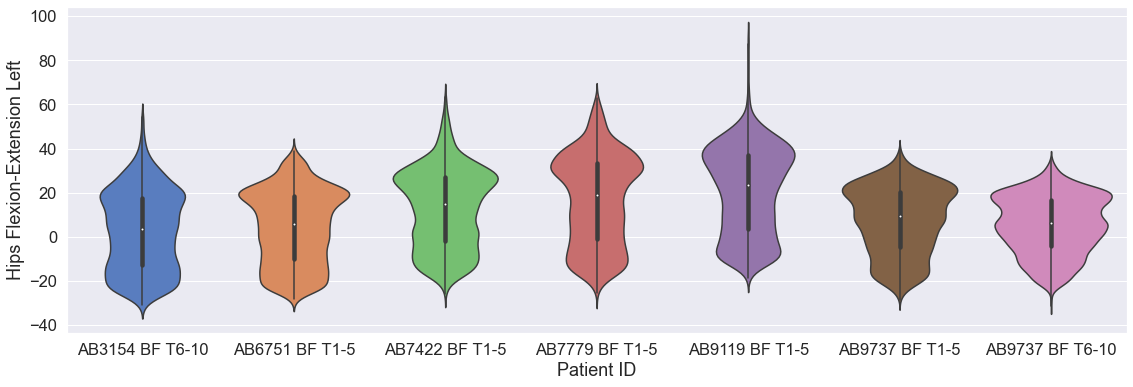

In [19]:
rcParams['figure.figsize'] = 19,6
sns.set(font_scale = 1.5)
ax = sns.violinplot(x="Patient ID", y="Hips Flexion-Extension Left", 
                    data=all_data, palette="muted")

In [20]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB3154 T6-10 BF"], palette="muted")

In [21]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB5498 BF T6-10"], palette="muted")

## Data Processing

In [22]:
train_samples = count_nsamples(train_data)
val_samples = count_nsamples(val_data)

For patient: AB3154 BF T6-10, trial: 1, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 2, there are: 541 time-points
For patient: AB3154 BF T6-10, trial: 3, there are: 613 time-points
For patient: AB3154 BF T6-10, trial: 4, there are: 601 time-points
For patient: AB3154 BF T6-10, trial: 5, there are: 711 time-points
For patient: AB3154 BF T6-10, trial: 6, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 7, there are: 1031 time-points
For patient: AB3154 BF T6-10, trial: 8, there are: 896 time-points
For patient: AB3154 BF T6-10, trial: 9, there are: 812 time-points
For patient: AB6751 BF T1-5, trial: 1, there are: 761 time-points
For patient: AB6751 BF T1-5, trial: 2, there are: 733 time-points
For patient: AB6751 BF T1-5, trial: 3, there are: 731 time-points
For patient: AB6751 BF T1-5, trial: 4, there are: 682 time-points
For patient: AB6751 BF T1-5, trial: 5, there are: 710 time-points
For patient: AB6751 BF T1-5, trial: 6, there are: 708 time-points


In [23]:
print(f'Number of train samples: {train_samples}')
print(f'Number of validation samples: {val_samples}')

Number of train samples: 49
Number of validation samples: 30


In [24]:
# os.makedirs('D:\Study 2 Data\Pre-process sample', exist_ok=True)  #check if directory exists
# all_data.to_csv('D:\Study 2 Data\Pre-process sample/exported-data3.csv')  #export data to csv

#### Convert Data into numpy array for forming windows

In [25]:
m = all_data['Patient ID'].unique()

In [26]:

def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2000, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store


In [27]:
train_columns, train_data_np = pd_to_np_converter(train_data, train_samples, features)
val_columns, val_data_np = pd_to_np_converter(val_data, val_samples, features)

print(f'train_data_np.shape: {train_data_np.shape}')
print(f'val_data_np.shape: {val_data_np.shape}')

train_data_np.shape: (49, 2000, 6)
val_data_np.shape: (30, 2000, 6)


In [28]:
train_columns[3:].tolist() 

['Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

In [29]:
features == train_columns[3:].tolist() 

True

In [30]:
labels_keys = train_columns[3:].tolist() #copy the train columns removing the first column headers'Patient ID', 'Trial', 'Time'


if features == labels_keys: # check that the features are the same as the label keys 
    print('YAY! Column headers of dataframe match features')
else:
    print('ERROR: Features and labels_keys do not match!')

YAY! Column headers of dataframe match features


#### Generate Dictionary for Features

In [31]:
labels_keys = features 

labels_idx = np.arange(0, len(labels_keys), 1)

labels = dict(zip(labels_keys, labels_idx))

len(labels)
labels
# labels_keys

{'Hips Flexion-Extension Left': 0,
 'Knees Flexion-Extension Left': 1,
 'Ankles Dorsiflexion-Plantarflexion Left': 2,
 'Hips Flexion-Extension Right': 3,
 'Knees Flexion-Extension Right': 4,
 'Ankles Dorsiflexion-Plantarflexion Right': 5}

#### Process Data: Window Generation

In [32]:
# Creating training datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_train_windows = np.zeros((samples_per_file*train_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_train_windows = np.zeros((samples_per_file*train_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
train_sample_sum = 0
train_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(train_samples): 
       
    X_values, Y_values = window_generator(
        train_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_train_windows[start_idx:end_idx, :, :] = X_values
    Y_train_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    train_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_train_data = X_train_windows[:end_idx, :, :]
Y_train_data = Y_train_windows[:end_idx, :, :]


print(f'shape of X_train_windows: {X_train_windows.shape}')
print(f'shape of Y_train_windows: {Y_train_windows.shape}')

print(f'shape of X_train_data: {X_train_data.shape}')
print(f'shape of Y_train_data: {Y_train_data.shape}')

trimmed_seqLen: 651
number of slides is: 551
trimmed_seqLen: 541
number of slides is: 441
trimmed_seqLen: 613
number of slides is: 513
trimmed_seqLen: 601
number of slides is: 501
trimmed_seqLen: 711
number of slides is: 611
trimmed_seqLen: 651
number of slides is: 551
trimmed_seqLen: 1031
number of slides is: 931
trimmed_seqLen: 896
number of slides is: 796
trimmed_seqLen: 812
number of slides is: 712
trimmed_seqLen: 761
number of slides is: 661
trimmed_seqLen: 733
number of slides is: 633
trimmed_seqLen: 731
number of slides is: 631
trimmed_seqLen: 682
number of slides is: 582
trimmed_seqLen: 710
number of slides is: 610
trimmed_seqLen: 708
number of slides is: 608
trimmed_seqLen: 682
number of slides is: 582
trimmed_seqLen: 675
number of slides is: 575
trimmed_seqLen: 900
number of slides is: 800
trimmed_seqLen: 761
number of slides is: 661
trimmed_seqLen: 1004
number of slides is: 904
trimmed_seqLen: 781
number of slides is: 681
trimmed_seqLen: 689
number of slides is: 589
trimmed_

In [33]:
# Creating validation datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_windows = np.zeros((samples_per_file*val_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_sample_sum = 0
val_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator(
        val_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_windows[start_idx:end_idx, :, :] = X_values
    Y_val_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_data = X_val_windows[:end_idx, :, :]
Y_val_data = Y_val_windows[:end_idx, :, :]


print(f'shape of X_val_windows: {X_val_windows.shape}')
print(f'shape of Y_val_windows: {Y_val_windows.shape}')

print(f'shape of X_val_data: {X_val_data.shape}')
print(f'shape of Y_val_data: {Y_val_data.shape}')

trimmed_seqLen: 1027
number of slides is: 927
trimmed_seqLen: 1066
number of slides is: 966
trimmed_seqLen: 1061
number of slides is: 961
trimmed_seqLen: 880
number of slides is: 780
trimmed_seqLen: 995
number of slides is: 895
trimmed_seqLen: 921
number of slides is: 821
trimmed_seqLen: 897
number of slides is: 797
trimmed_seqLen: 920
number of slides is: 820
trimmed_seqLen: 836
number of slides is: 736
trimmed_seqLen: 874
number of slides is: 774
trimmed_seqLen: 801
number of slides is: 701
trimmed_seqLen: 877
number of slides is: 777
trimmed_seqLen: 833
number of slides is: 733
trimmed_seqLen: 811
number of slides is: 711
trimmed_seqLen: 909
number of slides is: 809
trimmed_seqLen: 824
number of slides is: 724
trimmed_seqLen: 1843
number of slides is: 1743
trimmed_seqLen: 1565
number of slides is: 1465
trimmed_seqLen: 1296
number of slides is: 1196
trimmed_seqLen: 1241
number of slides is: 1141
trimmed_seqLen: 1251
number of slides is: 1151
trimmed_seqLen: 951
number of slides is: 8

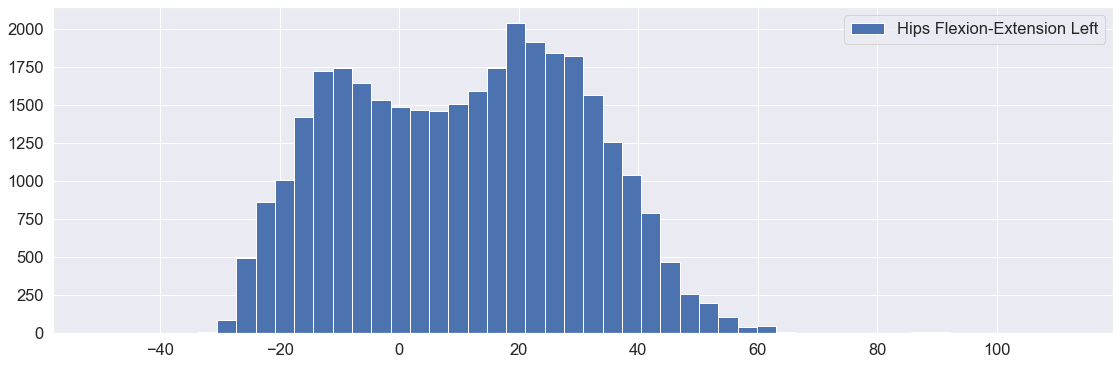

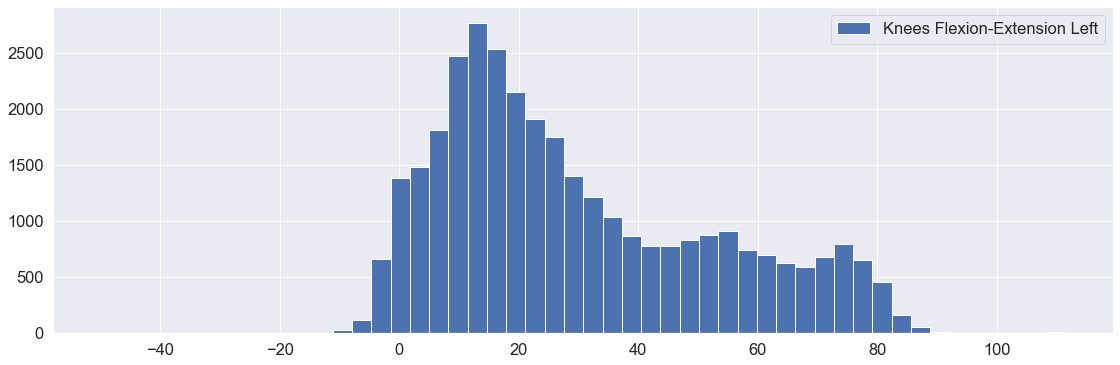

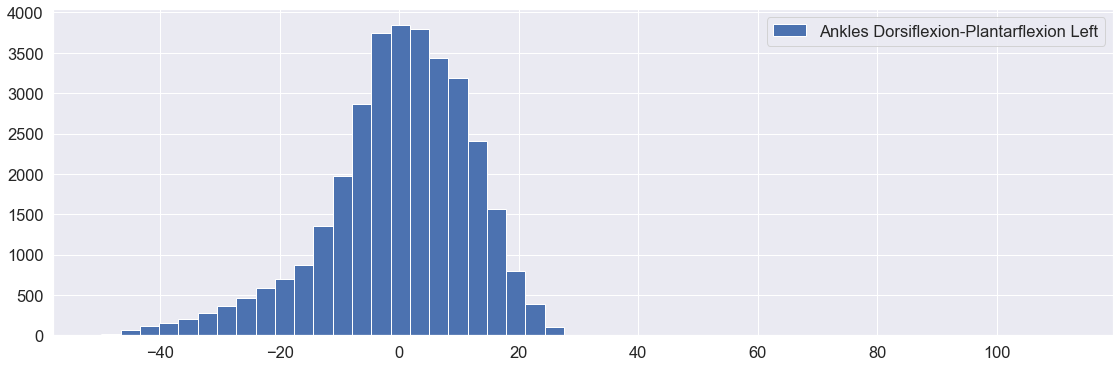

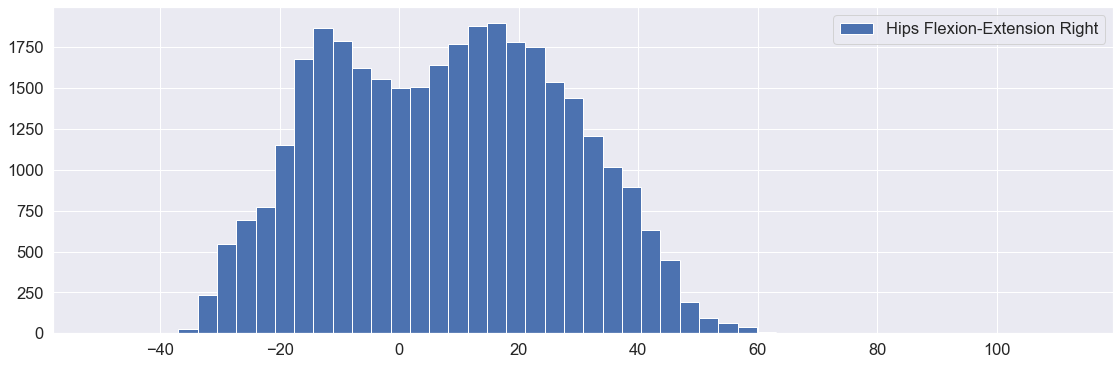

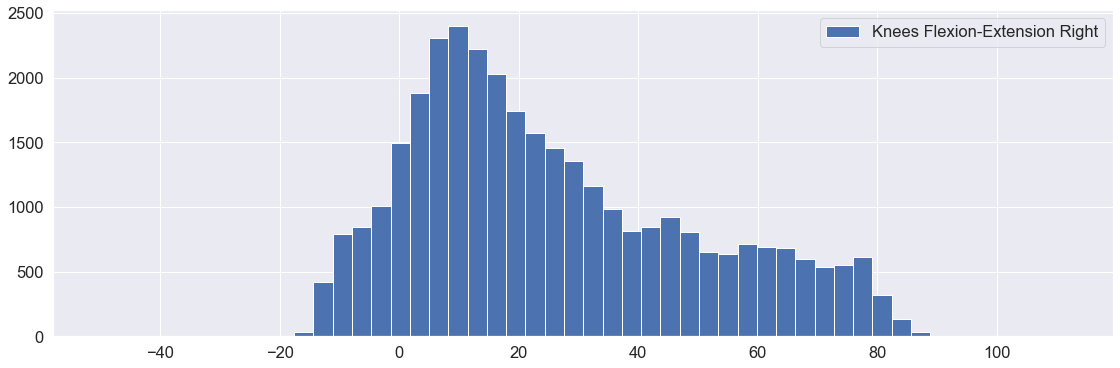

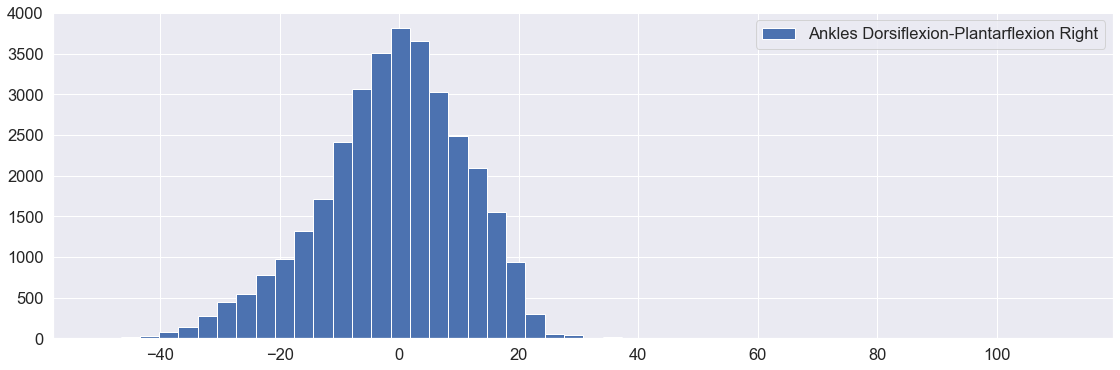

In [34]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(Y_train_data[:,:,f].reshape(-1,1), label = features[f], bins=50, range=(Y_train_data.min(), Y_train_data.max()))
    plt.legend()
    plt.show()

#### Process Data: Normalisation/Standarisation

In [35]:
X_train_norm, scalars = normalise_fit(X_train_data)
Y_train_norm = normalise_transform(Y_train_data, scalars)


X_val_norm = normalise_transform(X_val_data, scalars)
Y_val_norm = normalise_transform(Y_val_data, scalars)


scalars

array([[-30.96504974, -10.40592957, -51.19487   , -35.33768082,
        -15.22187042, -47.07204819],
       [ 90.99295044, 111.41835022,  28.31365967,  68.16752625,
         91.98961639,  37.62150955]])

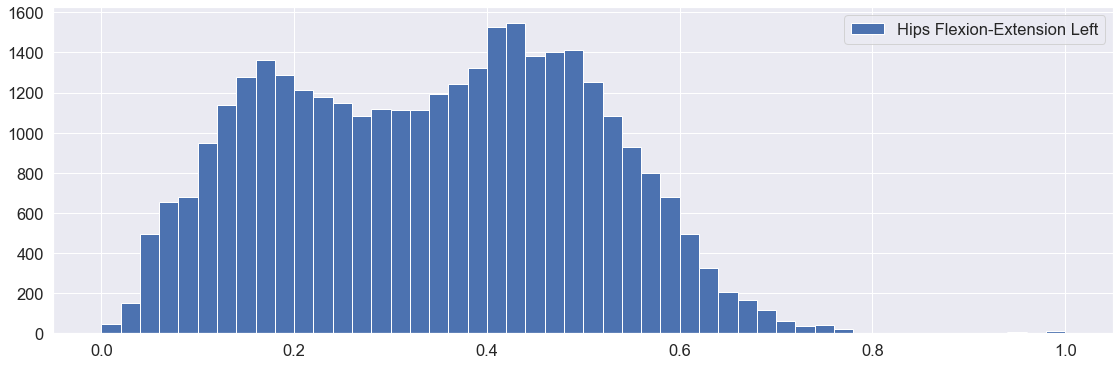

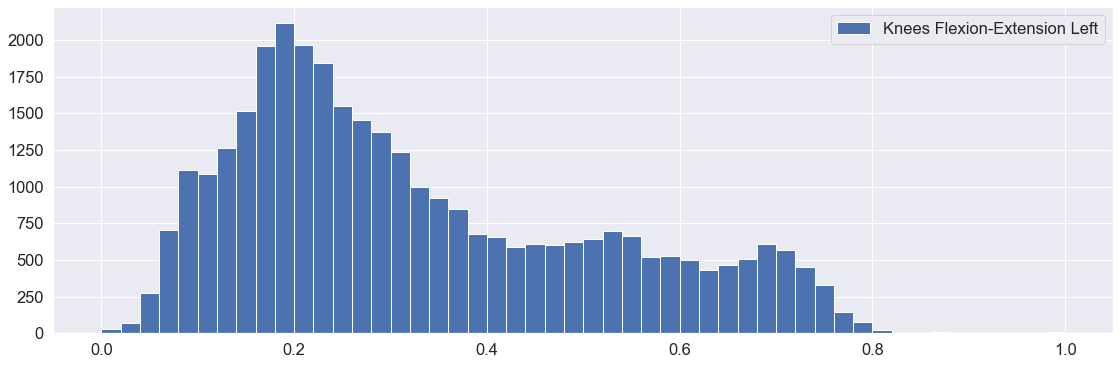

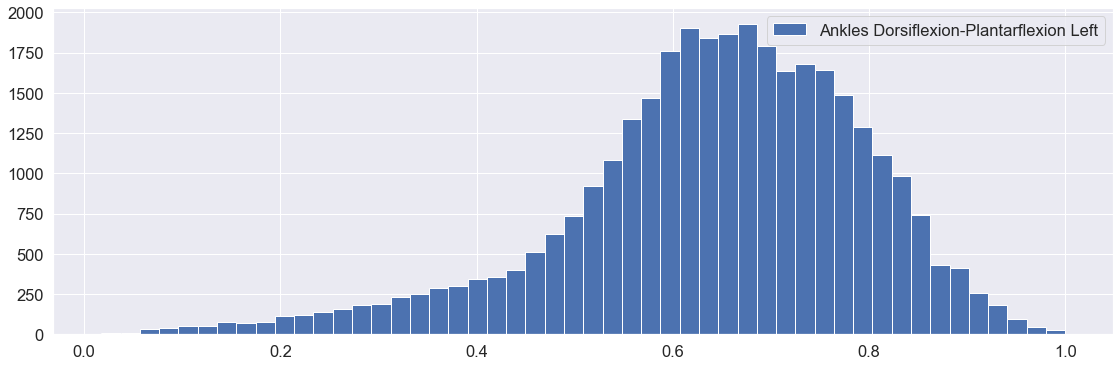

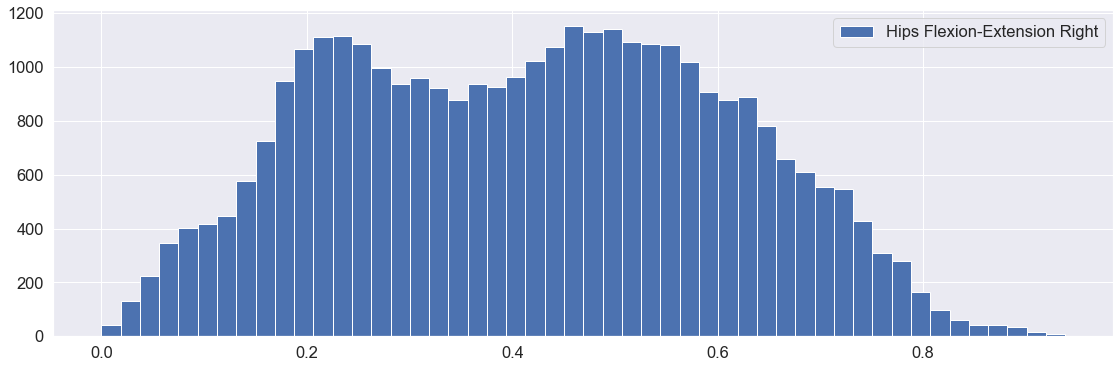

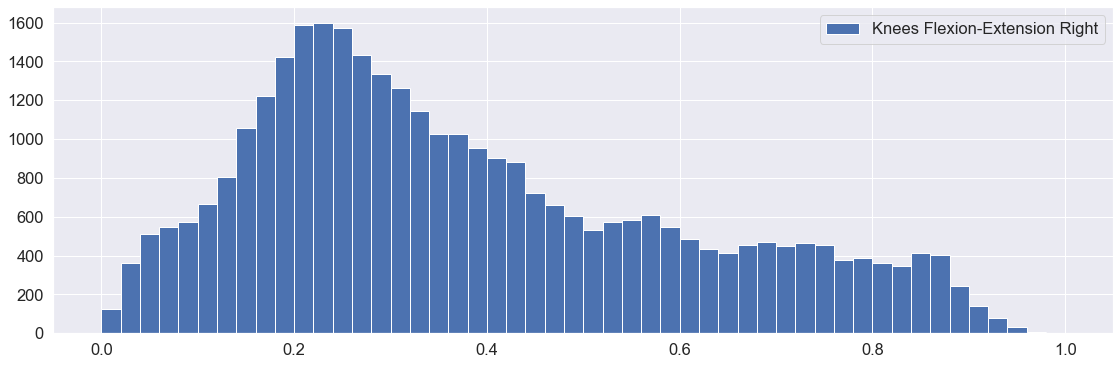

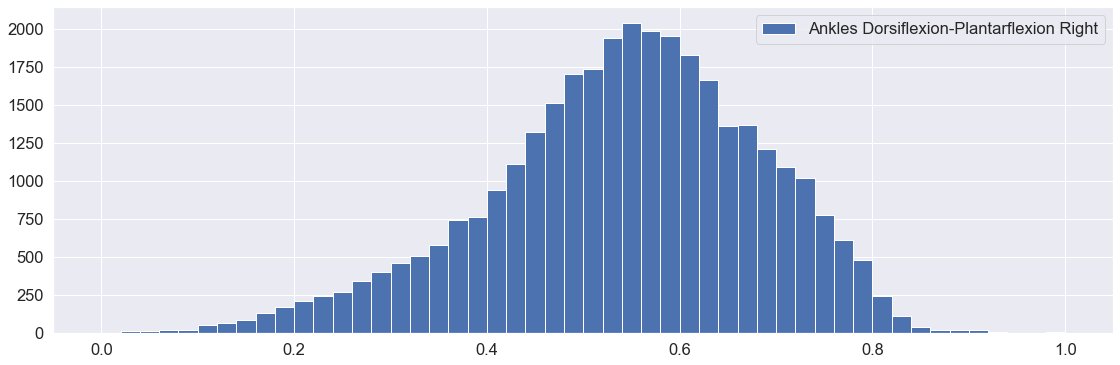

In [36]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(Y_train_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [37]:
# Convert to Tensor 
# do not store on GPU (yet)
X_train = torch.from_numpy(X_train_norm).float()
Y_train = torch.from_numpy(Y_train_norm).float()

X_val = torch.from_numpy(X_val_norm).float()
Y_val = torch.from_numpy(Y_val_norm).float()

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

print(f'X_val shape: {X_val.shape}')
print(f'Y_val shape: {Y_val.shape}')


X_train shape: torch.Size([33262, 100, 6])
Y_train shape: torch.Size([33262, 1, 6])
X_val shape: torch.Size([28296, 100, 6])
Y_val shape: torch.Size([28296, 1, 6])


In [38]:
# #only use for predicting a single feautre
# Y_train = Y_train[:,:,1].unsqueeze(-1)
# Y_val = Y_val[:,:,1].unsqueeze(-1)

# print(f'Y_train shape: {Y_train.shape}')

# print(f'Y_val shape: {Y_val.shape}')

In [39]:
# output_window=1
# features = ['Knees Flexion-Extension Left']

In [40]:
train_dataset = gaitDataset(X_train, Y_train)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)

val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")


Train Dataset length: 33262
Val Dataset length: 28296


#### Import Scalars for healthy and CP gait 

In [41]:
#Export scalars for healthy gait 
import pickle

fname = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'healthy_scalars.pickle'

# healthy_scalars = scalars.copy()

#export scalars as pickle file 
# with open(fname, 'wb') as handle:
#     pickle.dump(healthy_scalars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Import pickle file
with open(fname, 'rb') as handle:
    healthy_scalars = pickle.load(handle)


In [42]:
#Export scalars for CP gait 
import pickle

fname = r'D:\Study 2 Data\CP Gait' + '\\' + 'cp_scalars.pickle'

# cp_scalars = scalars.copy()

# #export scalars as pickle file 
# with open(fname, 'wb') as handle:
#     pickle.dump(cp_scalars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # Import pickle file
with open(fname, 'rb') as handle:
    cp_scalars = pickle.load(handle)


In [43]:
scalars

array([[-30.96504974, -10.40592957, -51.19487   , -35.33768082,
        -15.22187042, -47.07204819],
       [ 90.99295044, 111.41835022,  28.31365967,  68.16752625,
         91.98961639,  37.62150955]])

In [44]:
cp_scalars

array([[-36.98514175, -23.06749916, -70.37687683, -36.93022156,
        -27.71589088, -78.77171326],
       [ 56.23810959,  95.86148834,  31.93268967,  61.58385086,
         81.80223846,  31.88804054]])

In [45]:
healthy_scalars

array([[-31.35185051, -10.40592957, -51.19487   , -35.33768082,
        -15.22187042, -47.07204819],
       [ 63.45571136,  98.09671783,  28.31365967,  64.0535965 ,
         88.80323029,  35.22827911]])

## Training Models

#### Deep Learning Models

In [46]:
model = 'LSTM'
exp_ID = '074'

In [47]:
MODEL_PATH =   r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '.pt'

In [48]:
MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp074-2022-07-25-LSTM-In100-Out1.pt'

In [264]:
#copied from https://github.com/oliverguhr/transformer-time-series-prediction/blob/master/transformer-multistep.py
import math 
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=1000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1).to(DEVICE) #pe should be size [1, max_len,d_model] after transpose it will be [max_len, 1, d_model]
        #pe.requires_grad = False
        self.register_buffer('pe', pe) 

    def forward(self, x):
        a = x + self.pe[:x.size(0), :]
        return a.to(DEVICE)
       




In [267]:
class TransAm(nn.Module):
    def __init__(self,feature_size,num_layers,dropout=0.1,device='device'):
        super(TransAm, self).__init__()

        self.device = device
        self.feature_size = feature_size
        # self.out_seq_len = 6
        self.d_model= 100

        
        self.encoder_input = nn.Linear(
        in_features=feature_size, 
        out_features=self.d_model
        )

        self.pos_encoder = PositionalEncoding(self.d_model).to(DEVICE)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.d_model, nhead=5, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(10000,6)

    def forward(self,src):
        # print(f'input shape: {src.shape}')

        src = self.encoder_input(src)
        # print(f'encoder input shape: {src.shape}')
        src = self.pos_encoder(src)
        # print(f'after positional encoding: {src.shape}')

        encoder_out = self.transformer_encoder(src)
        # print(f'output of transfoermer encoder shape: {encoder_out.shape}')

        encoder_out = encoder_out.reshape(src.shape[0], -1)
        # print(f'reshaped encoder out: {encoder_out.shape}')


        output = self.decoder(encoder_out).reshape(src.shape[0], 1, self.feature_size)
        # print(f'output of decoder shape: {output.shape}')

        
        return output

In [268]:
# Training the LSTM model using a loss function and a optimiser
#ORIGINAL
def train_transformer(model, train_dataloader, val_dataloader, num_epochs, learning_rate, device):
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

        # print(f'val loss: {val_loss[epoch]}')

        # print(f'min val loss: {min_val_loss}')
        # Save best model so far
        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

    return train_loss, val_loss

In [269]:
# Training the MLP model using a loss function and a optimiser
def train_MLP(model, train_dataloader, val_dataloader, num_epochs, learning_rate):
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

    return train_loss, val_loss

        

In [270]:
# # # Train LSTM 
input_size=len(features)
hidden_size=16
num_layers=1
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
num_epochs=50
learning_rate= 0.001


model_transformer = TransAm(feature_size=6,num_layers=1,dropout=0).to(DEVICE)
train_history, val_history = train_MLP(model_transformer, train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs=num_epochs, learning_rate=learning_rate) #ADJUSTED

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: [1/50] Training loss: 0.09979366599481392
Epoch: [1/50] Validation loss: 0.01461446512869354
Epoch: [2/50] Training loss: 0.0019414515877612688
Epoch: [2/50] Validation loss: 0.006327811008224548
Epoch: [3/50] Training loss: 0.0019935325782101314
Epoch: [3/50] Validation loss: 0.026671862372823353
Epoch: [4/50] Training loss: 0.001980601919953747
Epoch: [4/50] Validation loss: 0.020250869708630326
Epoch: [5/50] Training loss: 0.001513563375780135
Epoch: [5/50] Validation loss: 0.01282645010436743
Epoch: [6/50] Training loss: 0.0013153966572784926
Epoch: [6/50] Validation loss: 0.0024662187553173994
Epoch: [7/50] Training loss: 0.0009261132742092461
Epoch: [7/50] Validation loss: 0.0022579532984833596
Epoch: [8/50] Training loss: 0.0007112708398311112
Epoch: [8/50] Validation loss: 0.005547625622001745
Epoch: [9/50] Training loss: 0.0005766539941340363
Epoch: [9/50] Validation loss: 0.006324852985135243
Epoch: [10/50] Training loss: 0.00045663811451959193
Epoch: [10/50] Validatio

#### Load Checkpoint Model

In [271]:
# Testing function 
def test_MLP(model, dataloader):
    loss_function = nn.MSELoss(reduction='mean')
    model.eval()
    actual_output, pred_output = [], []
    running_loss = 0. 
    
    with torch.no_grad():
        for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

            batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

            # if idx==0:
            #     batch_preds = model(batch_inputs)
            #     # print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     current_preds = batch_preds
            #     all_preds = batch_preds

            # else:
            #     batch_preds = model(batch_inputs)
            #     print(f'batch shape: {batch_preds.shape}')
            #     loss = loss_function(batch_preds, batch_targets)
            #     running_loss += loss.item()
            #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
            #     current_preds = batch_preds

            batch_preds = model(batch_inputs)
            loss = loss_function(batch_preds, batch_targets)
            running_loss += loss.item()
            actual_output.append(batch_targets)
            pred_output.append(batch_preds)


            #             lst = []
            # print(f'{x.size()}')
            # for i in range(10):
            #     x += i  # say we do something with x at iteration i
            #     lst.append(x)
            # # lstt = torch.stack([x for _ in range(10)])
            # lstt = torch.stack(lst)
            # print(lstt.size())

        total_loss = running_loss / len(dataloader)

        actual_output_tensor = torch.vstack(actual_output)
        pred_output_tensor = torch.vstack(pred_output)
    
    return pred_output_tensor, actual_output_tensor, total_loss

In [272]:
MODEL_PATH_CHECKPOINT = r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' +  '\\' + 'Exp073-2022-07-24-Transformer-In100-Out1' + '.pt'

In [273]:
#set parameters of the model 
input_size=len(features)
hidden_size=16
num_layers=1
in_seq_len=input_window

out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


#Load checkpint model and its parameters
# checkpoint_model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
# checkpoint_model = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
checkpoint_model = TransAm(feature_size=6,num_layers=1,dropout=0.1).to(DEVICE)

optimiser = torch.optim.Adam(checkpoint_model.parameters(), lr = learning_rate)

checkpoint = torch.load(MODEL_PATH_CHECKPOINT)
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch = checkpoint['epoch']
best_val_loss = checkpoint['loss']

checkpoint_model.eval()

TransAm(
  (encoder_input): Linear(in_features=6, out_features=100, bias=True)
  (pos_encoder): PositionalEncoding()
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
    )
    (linear1): Linear(in_features=100, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=100, bias=True)
    (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_

In [274]:
MODEL_PATH_CHECKPOINT

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp073-2022-07-24-Transformer-In100-Out1.pt'

In [275]:
best_epoch

44

In [276]:
best_val_loss

4.128597641484102e-05

In [277]:
preds_val_norm, actual_val_norm, val_loss = test_MLP(checkpoint_model, val_dataloader)
# preds_val_norm, actual_val_norm, val_loss = test_MLP(checkpoint_model, val_dataloader)

# predicted_values_val_H = pred_val_output_H.cpu().numpy()
# actual_values_val_H = actual_val_output_H.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values val normalised: {preds_val_norm.cpu().numpy().shape}')
print(f'shape of actual values val normalised: {actual_val_norm.cpu().numpy().shape}')

preds_val = denormalise(preds_val_norm.cpu().numpy(), scalars)
actual_val = denormalise(actual_val_norm.cpu().numpy(), scalars)

print(f'Shape of predicted values test after denormalisation: {preds_val.shape}')
print(f'shape of actual values test after denormalisation: {preds_val.shape}')

0it [00:00, ?it/s]

val loss: 4.128618608163091e-05
Shape of predicted values val normalised: (28296, 1, 6)
shape of actual values val normalised: (28296, 1, 6)
Shape of predicted values test after denormalisation: (28296, 1, 6)
shape of actual values test after denormalisation: (28296, 1, 6)


In [278]:
val_mse_loss, val_mse_std = mse_loss(preds_val, actual_val, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(preds_val, actual_val, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

Val MSE Loss: 0.49085886513700405
Val MSE std: 0.8119956254959106
Val MAE Loss: 0.5312079869210018
Val MAE std: 0.4568116366863251


#### Plot MAE for individual steps

In [279]:
mae_timesteps_H = []
for s in range(output_window):
    # print(s)
    _ = mae_loss(np.expand_dims(preds_val[:,s,:],-1), np.expand_dims(actual_val[:,s,:],-1), reduction='mean', format='np')
    mae_timesteps_H.append(_)

    print(f'MAE loss and standard deviation for timestep {s+1} is: {mae_timesteps_H[s]}')

preds_val[:,:,:].shape

MAE loss and standard deviation for timestep 1 is: (0.5312079869210018, 0.45681164)


(28296, 1, 6)

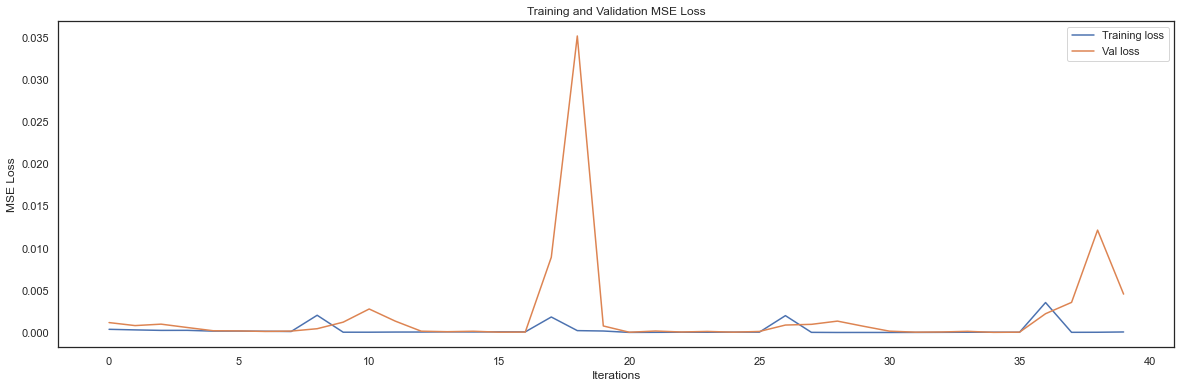

In [280]:
plt.plot(train_history[10:], label = 'Training loss')
plt.plot(val_history[10:], label = 'Val loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()

In [ ]:
# pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

# predicted_values_val = pred_val_output.cpu().numpy()
# actual_values_val = actual_val_output.cpu().numpy()

# print(f'val loss: {val_loss}')
# print(f'Shape of predicted values test: {predicted_values_val.shape}')
# print(f'shape of actual values test: {actual_values_val.shape}')

# predicted_val_denorm = denormalise(predicted_values_val, scalars)
# actual_val_denorm = denormalise(actual_values_val, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
# val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
# val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

# print(f'Val MSE Loss: {val_mse_loss}')
# print(f'Val MSE std: {val_mse_std}')
# print(f'Val MAE Loss: {val_mae_loss}')
# print(f'Val MAE std: {val_mae_std}')

In [ ]:
# val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# # val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# print(f"Train Dataset length: {len(train_dataset)}")
# print(f"Val Dataset length: {len(val_dataset)}")

In [ ]:
# pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

# predicted_values_val = pred_val_output.cpu().numpy()
# actual_values_val = actual_val_output.cpu().numpy()

# print(f'val loss: {val_loss}')
# print(f'Shape of predicted values test: {predicted_values_val.shape}')
# print(f'shape of actual values test: {actual_values_val.shape}')

# predicted_val_denorm = denormalise(predicted_values_val, scalars)
# actual_val_denorm = denormalise(actual_values_val, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
# val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
# val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

# print(f'Val MSE Loss: {val_mse_loss}')
# print(f'Val MSE std: {val_mse_std}')
# print(f'Val MAE Loss: {val_mae_loss}')
# print(f'Val MAE std: {val_mae_std}')

### Visualise Predictions

In [ ]:
from matplotlib import rcParams

In [ ]:
# s_num = 1 #sample number 
# f = 2 #feature

# samples = [2,3,4,3,2]
# f_values = [0,1,2,3,4,5]
# for s_num in samples:
#     for f in f_values:

#         input = X_val_data[s_num,:,f]

#         # print(f'input length: {len(input)}')
#         actual = actual_val[s_num,:,f]
#         preds = preds_val[s_num,:,f]
        
#         past_timepoints = np.arange(0,len(input))
#         # print(f'past_timepoints: {past_timepoints}')

#         future_timepoints = np.arange(len(input), len(input)+len(preds))
#         # print(f'future_timepoints: {future_timepoints}')

#         rcParams['figure.figsize'] = 19,6

#         # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
#         ax = sns.lineplot(x=past_timepoints[:], y=input[:])

#         # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
#         ax = sns.lineplot(x=future_timepoints, y=preds)
#         ax = sns.lineplot(x=future_timepoints, y=actual)
#         ax.set_xlabel('Time-step', fontsize =15)
#         ax.set_ylabel('Angle (degrees)', fontsize =15)
#         ax.set_title(f'Sample {s_num} - Feature {f} - {labels_keys[f]}')
#         plt.figure()


## Test Models


#### Load Test Data

In [281]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Val'
# file_dir = f'D:\Study 2 Data\Healthy Gait\evaluate'
test_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(test_files)} files in the specified path.")

test_files


Current working directory is: D:\Study 2 Data\Healthy Gait\Val
There are 2 files in the specified path.


['AB9737 BF T1-5.csv', 'AB9737 BF T6-10.csv']

In [282]:
val_subjects

['AB9737 BF T1-5', 'AB9737 BF T6-10']

In [283]:
test_data = create_dataframe(test_files, all_features)

Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [284]:
test_data.shape

(31296, 9)

In [285]:
test_samples = count_nsamples(test_data)

For patient: AB9737 BF T1-5, trial: 1, there are: 1027 time-points
For patient: AB9737 BF T1-5, trial: 2, there are: 1066 time-points
For patient: AB9737 BF T1-5, trial: 3, there are: 1061 time-points
For patient: AB9737 BF T1-5, trial: 4, there are: 880 time-points
For patient: AB9737 BF T1-5, trial: 5, there are: 995 time-points
For patient: AB9737 BF T1-5, trial: 6, there are: 921 time-points
For patient: AB9737 BF T1-5, trial: 7, there are: 897 time-points
For patient: AB9737 BF T1-5, trial: 8, there are: 920 time-points
For patient: AB9737 BF T1-5, trial: 9, there are: 836 time-points
For patient: AB9737 BF T1-5, trial: 10, there are: 874 time-points
For patient: AB9737 BF T1-5, trial: 11, there are: 801 time-points
For patient: AB9737 BF T1-5, trial: 12, there are: 877 time-points
For patient: AB9737 BF T1-5, trial: 13, there are: 833 time-points
For patient: AB9737 BF T1-5, trial: 14, there are: 811 time-points
For patient: AB9737 BF T1-5, trial: 15, there are: 909 time-points
F

In [286]:
def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] #[:,3:] is because we are
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store

In [287]:
test_columns, test_data_np = pd_to_np_converter(test_data, test_samples, features)

print(f'test_data_np.shape: {test_data_np.shape}')

test_columns

test_data_np.shape: (30, 2500, 6)


Index(['Patient ID', 'Trial', 'Time', 'Hips Flexion-Extension Left',
       'Knees Flexion-Extension Left',
       'Ankles Dorsiflexion-Plantarflexion Left',
       'Hips Flexion-Extension Right', 'Knees Flexion-Extension Right',
       'Ankles Dorsiflexion-Plantarflexion Right'],
      dtype='object')

In [288]:
# Selecting the features to be used when creating windows 
# approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 2000


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_test_windows = np.zeros((samples_per_file*test_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_test_windows = np.zeros((samples_per_file*test_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
test_sample_sum = 0
test_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(test_samples): 
       
    X_values, Y_values = window_generator(
        test_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_test_windows[start_idx:end_idx, :, :] = X_values
    Y_test_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    test_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_test_data = X_test_windows[:end_idx, :, :]
Y_test_data = Y_test_windows[:end_idx, :, :]


print(f'shape of X_test_windows: {X_test_windows.shape}')
print(f'shape of Y_test_windows: {Y_test_windows.shape}')

print(f'shape of X_test_data: {X_test_data.shape}')
print(f'shape of Y_test_data: {Y_test_data.shape}')

trimmed_seqLen: 1027
number of slides is: 927
trimmed_seqLen: 1066
number of slides is: 966
trimmed_seqLen: 1061
number of slides is: 961
trimmed_seqLen: 880
number of slides is: 780
trimmed_seqLen: 995
number of slides is: 895
trimmed_seqLen: 921
number of slides is: 821
trimmed_seqLen: 897
number of slides is: 797
trimmed_seqLen: 920
number of slides is: 820
trimmed_seqLen: 836
number of slides is: 736
trimmed_seqLen: 874
number of slides is: 774
trimmed_seqLen: 801
number of slides is: 701
trimmed_seqLen: 877
number of slides is: 777
trimmed_seqLen: 833
number of slides is: 733
trimmed_seqLen: 811
number of slides is: 711
trimmed_seqLen: 909
number of slides is: 809
trimmed_seqLen: 824
number of slides is: 724
trimmed_seqLen: 1843
number of slides is: 1743
trimmed_seqLen: 1565
number of slides is: 1465
trimmed_seqLen: 1296
number of slides is: 1196
trimmed_seqLen: 1241
number of slides is: 1141
trimmed_seqLen: 1251
number of slides is: 1151
trimmed_seqLen: 951
number of slides is: 8

#### Prepare Data for hModel

In [289]:
hModel_X_test_norm = normalise_transform(X_test_data, scalars)
hModel_Y_test_norm = normalise_transform(Y_test_data, scalars)

In [290]:
# run for single output only 
hModel_X_test_norm = normalise_transform(X_test_data, scalars)
hModel_Y_test_norm = normalise_transform(Y_test_data, scalars)

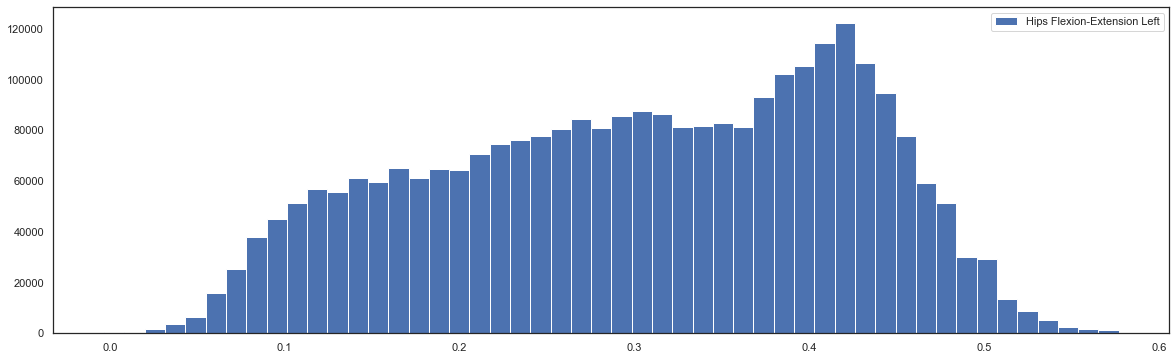

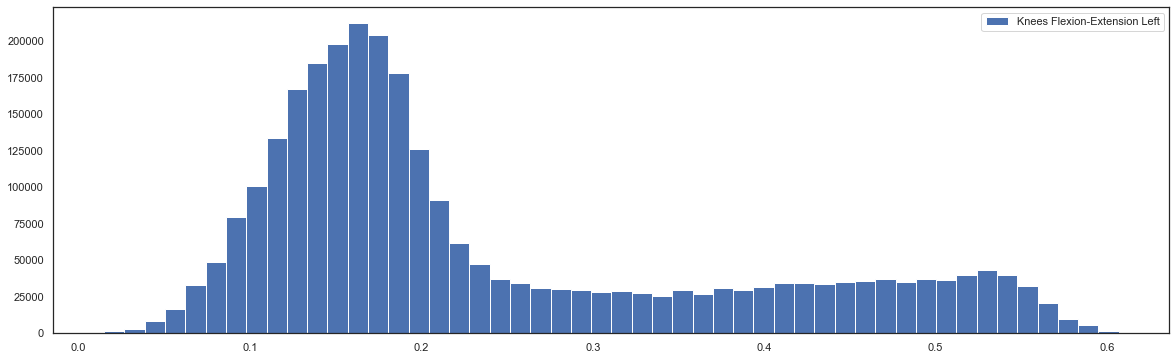

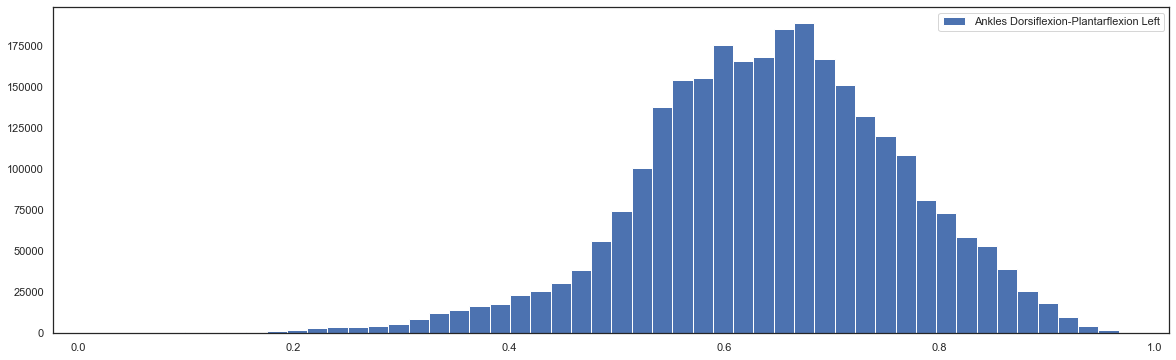

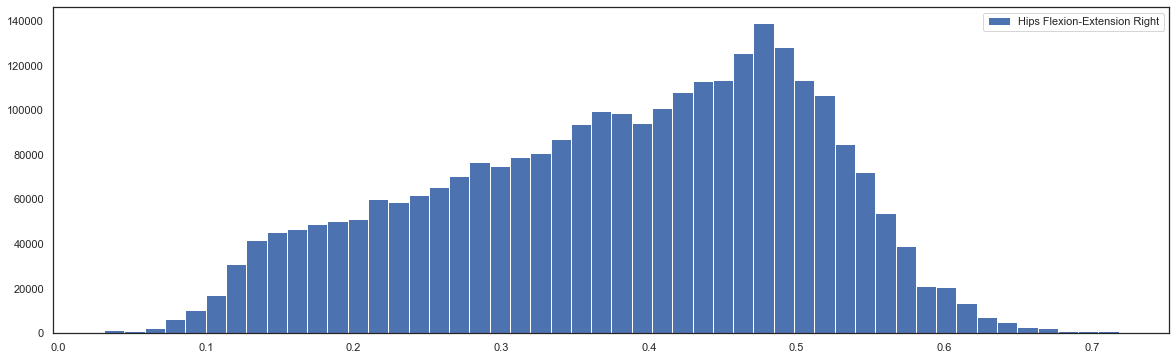

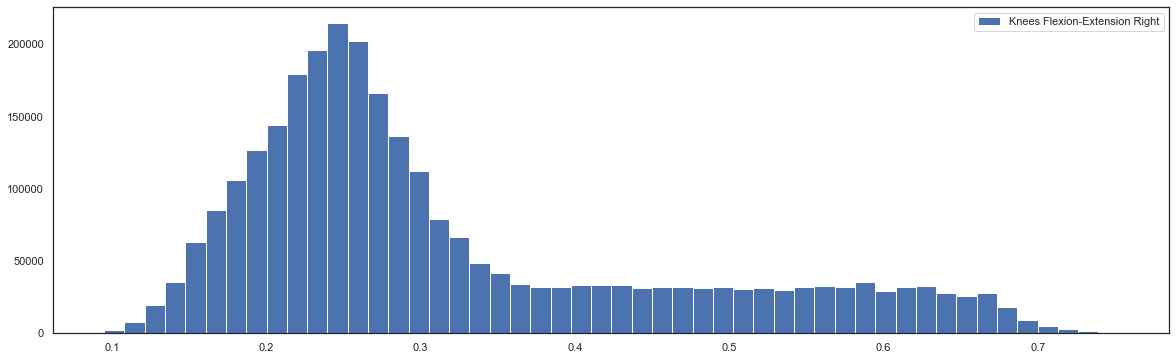

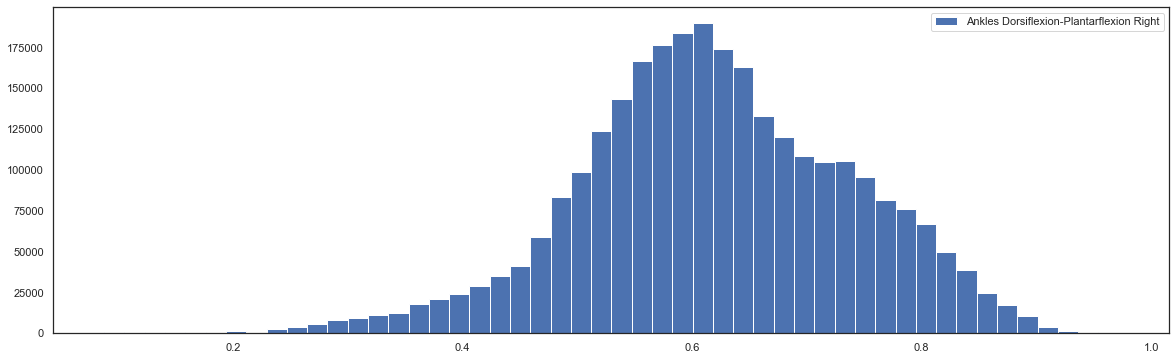

In [291]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(hModel_X_test_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

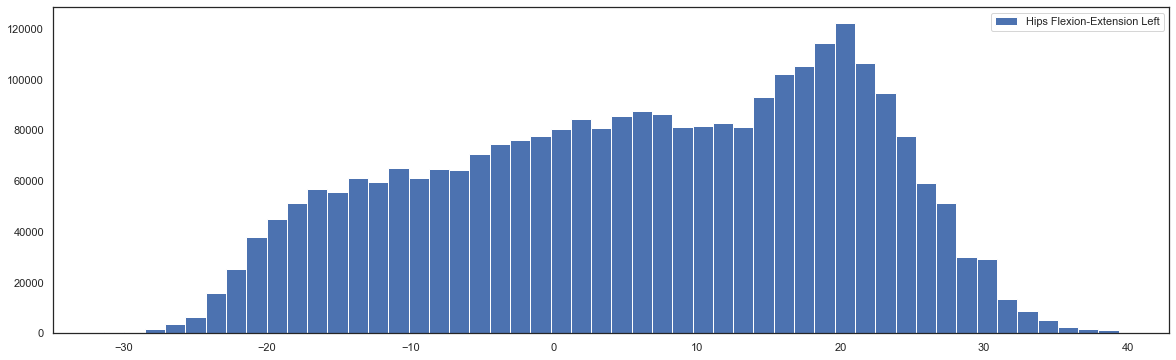

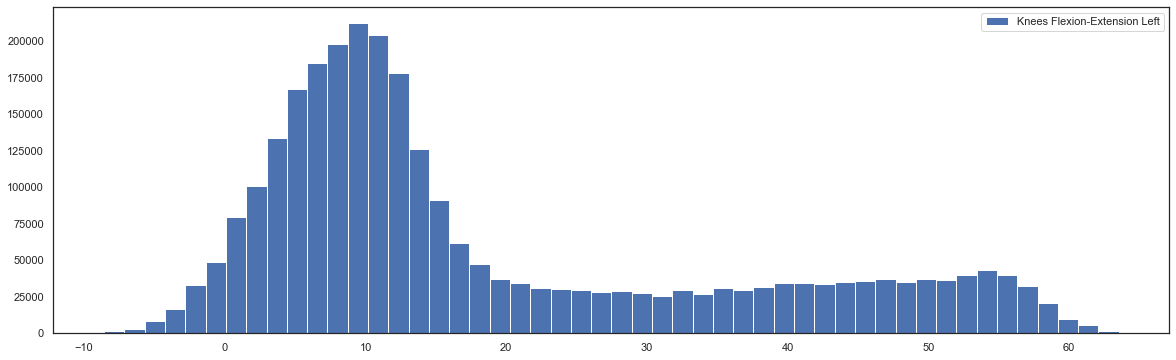

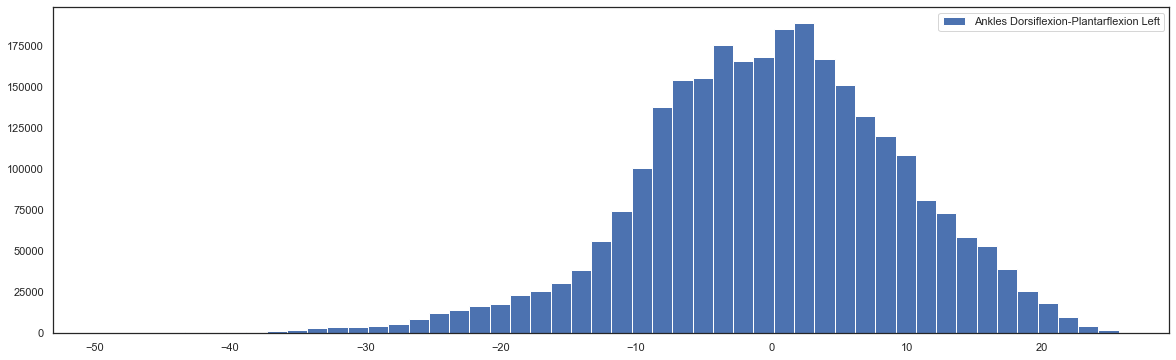

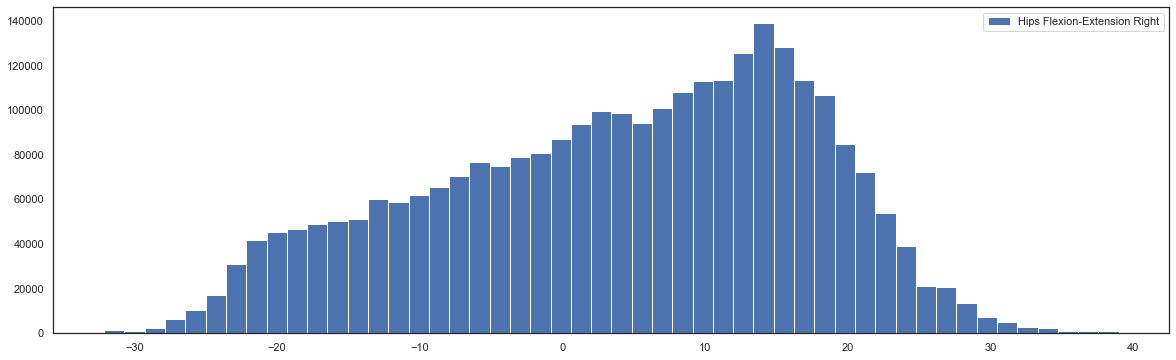

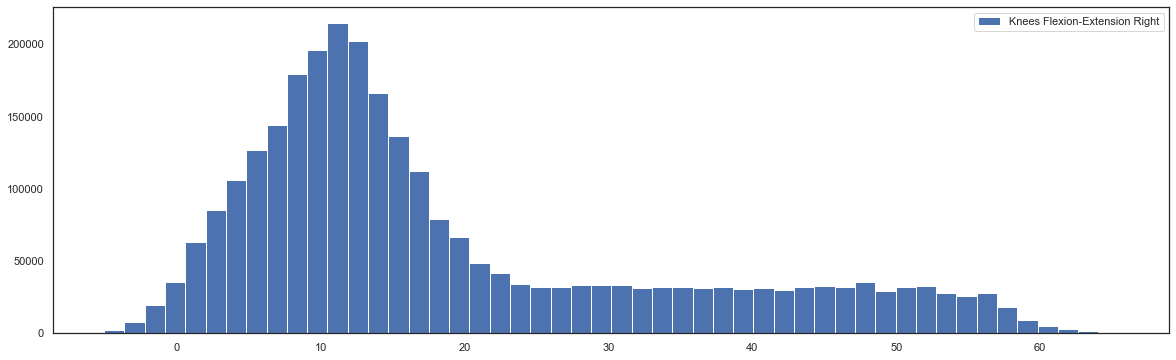

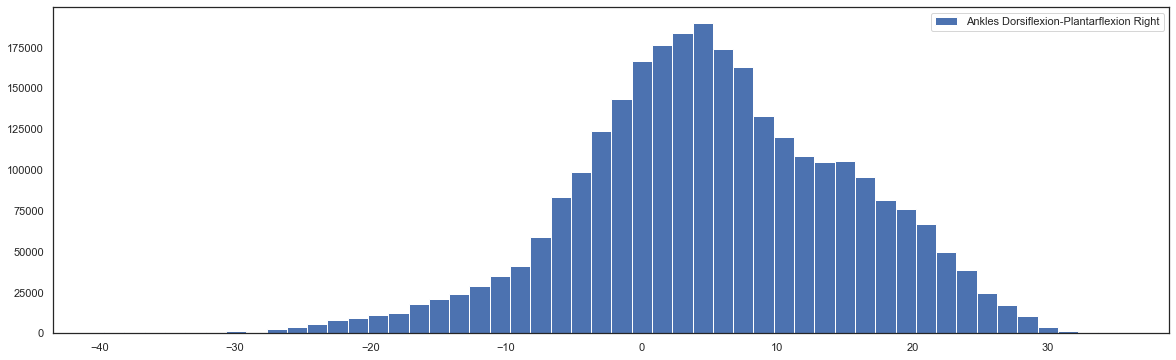

In [292]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(X_test_data[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [293]:
# Convert to Tensor 
# do not store on GPU (yet)
hModel_X_test_tensor = torch.from_numpy(hModel_X_test_norm).float()
hModel_Y_test_tensor = torch.from_numpy(hModel_Y_test_norm).float()

print(f'hModel_X_test_tensor shape: {hModel_X_test_tensor.shape}')
print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')


hModel_X_test_tensor shape: torch.Size([28296, 100, 6])
hModel_Y_test_tensor shape: torch.Size([28296, 1, 6])


In [294]:
# #only use if predicting one feature
# hModel_Y_test_tensor = hModel_Y_test_tensor[:,:,1].unsqueeze(-1)

# print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')

In [295]:
hModel_test_dataset = gaitDataset(hModel_X_test_tensor, hModel_Y_test_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
hModel_test_dataloader = DataLoader(hModel_test_dataset, batch_size=32, shuffle = False)

#### Load Healthy Model

In [296]:
H_MODEL_PATH = r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' +  '\\' + 'Exp073-2022-07-24-Transformer-In100-Out1' + '.pt'

In [297]:
#set parameters of the model 
input_size=len(features)
hidden_size=16
num_layers=1
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


# hModel = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
# hModel = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
hModel=TransAm(feature_size=6, num_layers=1, dropout=0.1).to(DEVICE)
optimiser = torch.optim.Adam(hModel.parameters(), lr = learning_rate)

checkpoint = torch.load(H_MODEL_PATH)
hModel.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch_hModel = checkpoint['epoch']
best_val_loss_hModel = checkpoint['loss']

hModel.eval()

TransAm(
  (encoder_input): Linear(in_features=6, out_features=100, bias=True)
  (pos_encoder): PositionalEncoding()
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
    )
    (linear1): Linear(in_features=100, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=100, bias=True)
    (norm1): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=100, out_features=100, bias=True)
        )
        (linear1): Linear(in_

In [298]:
H_MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp073-2022-07-24-Transformer-In100-Out1.pt'

In [299]:
best_epoch_hModel

44

In [300]:
best_val_loss_hModel

4.128597641484102e-05

In [301]:
hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_MLP(hModel, hModel_test_dataloader)
# hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_MLP(model_MLP, hModel_test_dataloader)


# H_model_predicted_values = hModel_preds_norm.cpu().numpy()
# H_model_actual_values = hModel_actual_norm.cpu().numpy()

print(f'hmodel loss: {hmodel_loss}')
print(f'Shape of predicted values test: {hModel_preds_norm.cpu().numpy().shape}')
print(f'shape of actual values test: {hModel_actual_norm.cpu().numpy().shape}')

# hModel_preds = denormalise(hModel_preds_norm.cpu().numpy(), healthy_scalars)
hModel_preds = denormalise(hModel_preds_norm.cpu().numpy(), scalars) #UNCOMMENT FOR PREDS shape (batch_size, num_features)
hModel_actual = denormalise(hModel_actual_norm.cpu().numpy(), scalars)


print(f'Shape of predicted values test post denormalisation: {hModel_preds.shape}')
print(f'shape of actual values test post denormalisation: {hModel_actual.shape}')

0it [00:00, ?it/s]

hmodel loss: 4.229241344675068e-05
Shape of predicted values test: (28296, 1, 6)
shape of actual values test: (28296, 1, 6)
Shape of predicted values test post denormalisation: (28296, 1, 6)
shape of actual values test post denormalisation: (28296, 1, 6)


In [302]:
hModel_mse_loss, hModel_mse_std = mse_loss(hModel_preds, hModel_actual, reduction='mean', format='np')
hModel_mae_loss, hModel_mae_std = mae_loss(hModel_preds, hModel_actual, reduction='mean', format='np')

print('Losses for Healthy trained model')
print(f'hmodel MSE Loss: {hModel_mse_loss}')
print(f'hmodel MSE std: {hModel_mse_std}')
print(f'hmodel MAE Loss: {hModel_mae_loss}')
print(f'hmodel MAE std: {hModel_mae_std}')

Losses for Healthy trained model
hmodel MSE Loss: 0.49708112638123175
hmodel MSE std: 0.7877575755119324
hmodel MAE Loss: 0.5429570618049665
hmodel MAE std: 0.4497540593147278


#### Load CP Data for CP Model

In [235]:
# file_dir = r'D:\Study 2 Data\CP Gait\Val'
# cp_files = os.listdir(file_dir) 

# # Changes the working directory to get the data from their location 
# os.chdir(file_dir)
# cwd = os.getcwd()

# print(f'Current working directory is: {cwd}')
# print(f"There are {len(cp_files)} files in the specified path.")

# cp_files


In [236]:
# CP_data = create_dataframe(cp_files, all_features)

In [237]:
# CP_data.shape

In [238]:
# CP_samples = count_nsamples(CP_data)

In [239]:
# def pd_to_np_converter(data, n_samples, features):
#     #create a numpy array that stores the data for export
#     sample_ID = []
#     # patients = 2
#     # n_trials = 10
#     # # samples = patients * n_trials
#     data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
#     i = 0

#     for p in data['Patient ID'].unique(): #loop over patients 
#         for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
#             pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
#             if pd_array.empty:
#                 continue
#                 # print('DataFrame is empty!')
#                 # print(f'Trail {t} does not exist in {p}')
#             else:
#                 np_array = pd_array.to_numpy()
#                 data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
#                 sample_ID.append(p+ ' Ts'+str(t)) 
#                 i +=1

#     return pd_array.columns, data_store

In [240]:
# CP_columns, CP_data_np = pd_to_np_converter(CP_data, CP_samples, features)

# print(f'CP_data_np.shape: {CP_data_np.shape}')


In [241]:
# # CHECKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
# # Selecting the features to be used when creating windows 
# approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# # samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
# samples_per_file = 2000


# # create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
# X_CP_windows = np.zeros((samples_per_file*CP_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
# Y_CP_windows = np.zeros((samples_per_file*CP_samples, output_window, len(features)), dtype=np.float32) 


# start_idx = 0 #setting start index to equal zero 
# CP_sample_sum = 0
# CP_excluded_samples = []
# # Create training windows 

# #for i in tqdm(range(train_size)): #Use for including all data including outliers 
# for i in range(CP_samples): 
       
#     X_values, Y_values = window_generator(
#         CP_data_np[i,:,:],
#         input_window=input_window, 
#         output_window=output_window, 
#         stride=stride, 
#         features=features,
#         labels=labels
#         )

#     end_idx = start_idx + X_values.shape[0]

#     # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

#     X_CP_windows[start_idx:end_idx, :, :] = X_values
#     Y_CP_windows[start_idx:end_idx, :, :] = Y_values

#     # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

#     start_idx = end_idx 
#     CP_sample_sum += X_values.shape[0]

#     # except Exception:
#     #     exception_msg(i)
#     #     train_excluded_samples.append(i)

# # print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
# X_CP_data = X_CP_windows[:end_idx, :, :]
# Y_CP_data = Y_CP_windows[:end_idx, :, :]


# print(f'shape of X_CP_windows: {X_CP_windows.shape}')
# print(f'shape of Y_CP_windows: {Y_CP_windows.shape}')

# print(f'shape of X_CP_data: {X_CP_data.shape}')
# print(f'shape of Y_CP_data: {Y_CP_data.shape}')

In [242]:
cpModel_X_test_norm = normalise_transform(X_test_data, cp_scalars)
cpModel_Y_test_norm = normalise_transform(Y_test_data, cp_scalars)

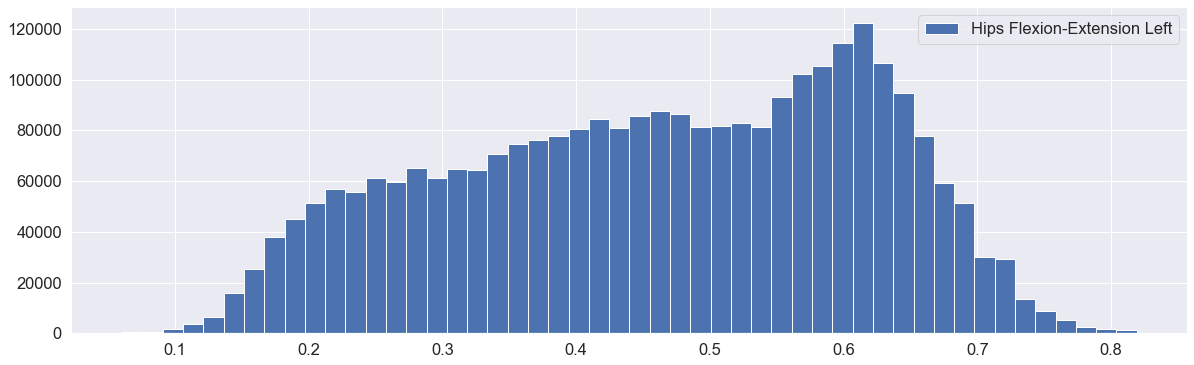

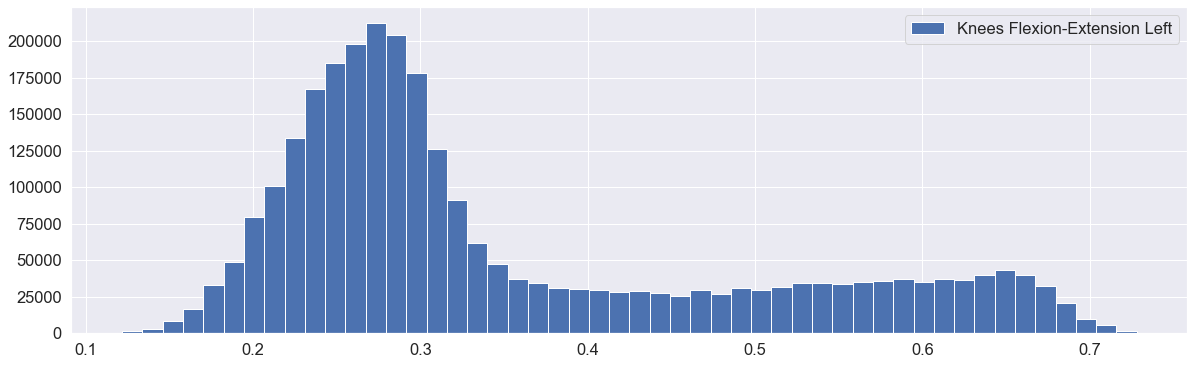

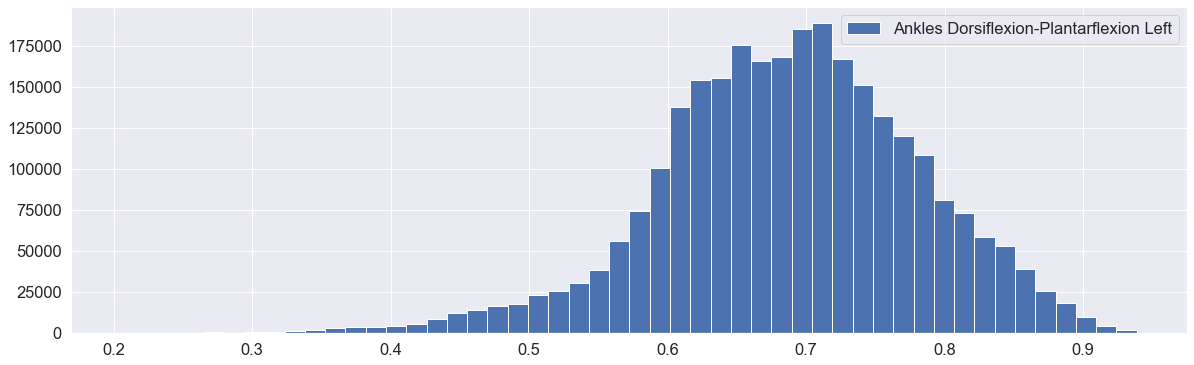

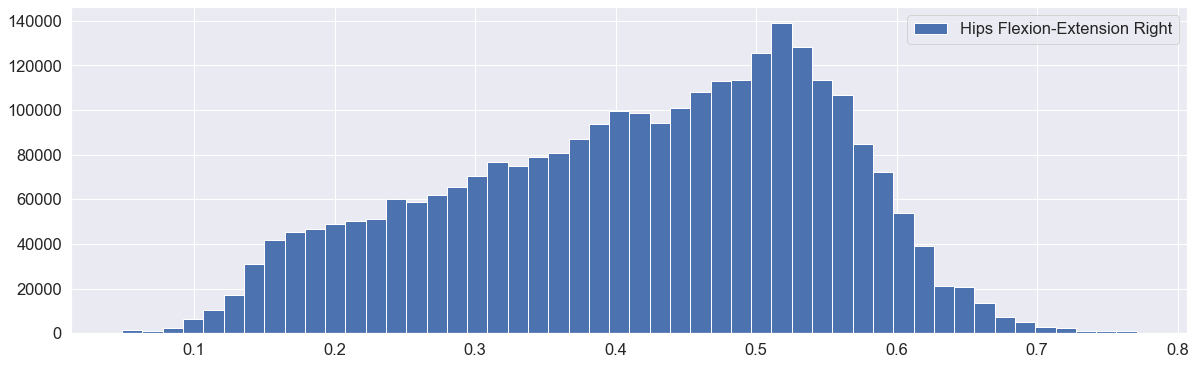

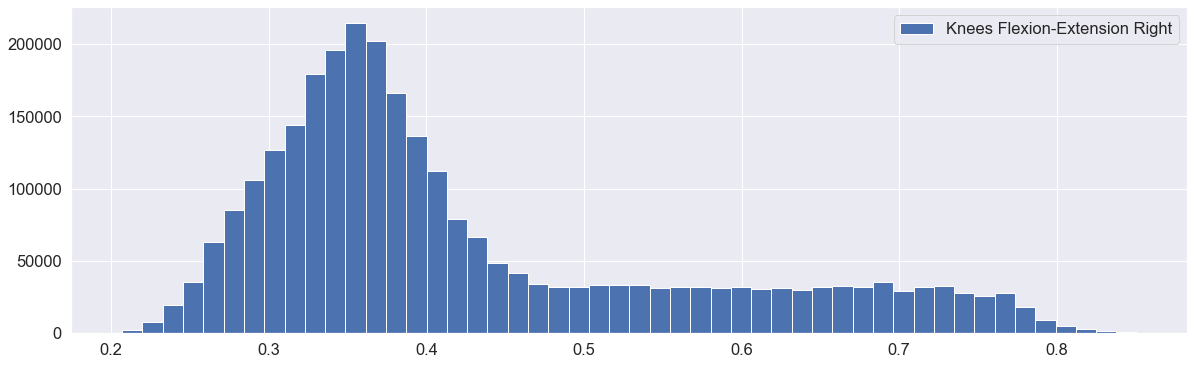

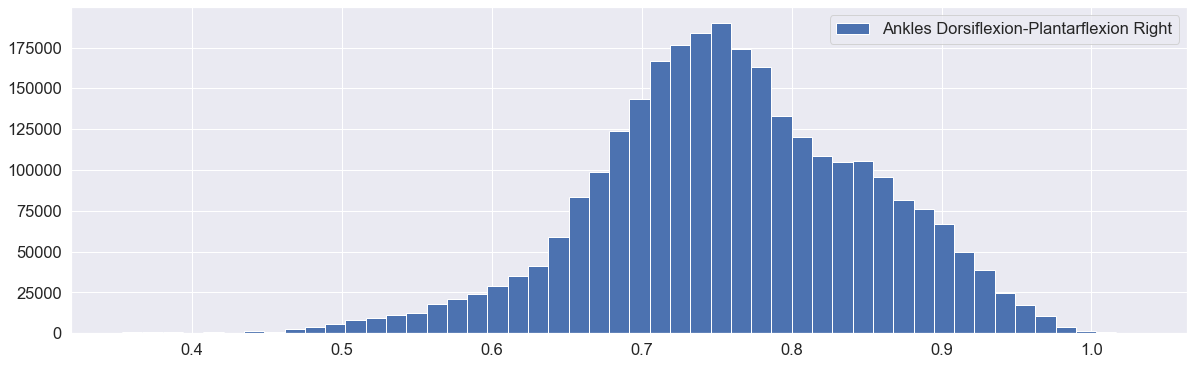

In [243]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(cpModel_X_test_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [244]:
# Convert to Tensor 
# do not store on GPU (yet)
cpModel_X_test_tensor = torch.from_numpy(cpModel_X_test_norm).float()
cpModel_Y_test_tensor = torch.from_numpy(cpModel_Y_test_norm).float()

print(f'cpModel_X_test_tensor shape: {cpModel_X_test_tensor.shape}')
print(f'cpModel_Y_test_tensor shape: {cpModel_Y_test_tensor.shape}')


cpModel_X_test_tensor shape: torch.Size([28296, 100, 6])
cpModel_Y_test_tensor shape: torch.Size([28296, 1, 6])


In [245]:
cpModel_test_dataset = gaitDataset(cpModel_X_test_tensor, cpModel_Y_test_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
cpModel_test_dataloader = DataLoader(cpModel_test_dataset, batch_size=32, shuffle = False)

#### Load CP Model

In [220]:
CP_MODEL_PATH = r'D:\Study 2 Results and Models\Study 2 Optimisation\2022-06-30 Optimisation LSTM CP 1'+  '\\' + 'LSTM CP-2022-07-01-trial6' + '.pt'

In [221]:
#set parameters of the model 
input_size=len(features)
hidden_size=100
num_layers=4
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


cpModel = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
optimiser = torch.optim.Adam(cpModel.parameters(), lr = learning_rate)

checkpoint = torch.load(CP_MODEL_PATH)
cpModel.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch_cpModel = checkpoint['epoch']
best_val_loss_cpModel = checkpoint['loss']

cpModel.eval()

NameError: name 'LSTM' is not defined

In [ ]:
CP_MODEL_PATH

In [ ]:
best_epoch_cpModel

In [ ]:
best_val_loss_cpModel

In [ ]:
cpModel_preds_norm, cpModel_actual_norm, cpModel_loss = test_LSTM(cpModel, cpModel_test_dataloader, DEVICE)

# H_model_predicted_values_CP = hModel_preds_norm_CP.cpu().numpy()
# H_model_actual_values_CP = hModel_actual_norm_CP.cpu().numpy()

print(f'cpModel loss: {cpModel_loss}')
print(f'Shape of predicted values test: {cpModel_preds_norm.cpu().numpy().shape}')
print(f'shape of actual values test: {cpModel_actual_norm.cpu().numpy().shape}')

cpModel_preds = denormalise(cpModel_preds_norm.cpu().numpy(), cp_scalars)
cpModel_actual = denormalise(cpModel_actual_norm.cpu().numpy(), cp_scalars)

print(f'Shape of predicted values test post denormalisation: {cpModel_preds.shape}')
print(f'shape of actual values test post denormalisation: {cpModel_actual.shape}')

In [ ]:
cpModel_mse_loss, cpModel_mse_std = mse_loss(cpModel_preds, cpModel_actual, reduction='mean', format='np')
cpModel_mae_loss, cpModel_mae_std = mae_loss(cpModel_preds, cpModel_actual, reduction='mean', format='np')

print('Losses for CP trained model')
print(f'cpModel MSE Loss: {cpModel_mse_loss}')
print(f'hmodel MSE std: {cpModel_mse_std}')
print(f'hmodel MAE Loss: {cpModel_mae_loss}')
print(f'hmodel MAE std: {cpModel_mae_std}')

### Compare Predictions of Healthy trained and CP model

In [246]:
from matplotlib import rcParams

In [247]:
s_num = 1 #sample number 
f = 2 #feature

sns.set_theme(style='white')


samples = [10300]
f_values = [0,1,2,3,4,5]
for s_num in samples:
    for f in f_values:
        
        # X_CP_norm = normalise_transform(X_CP_data, cp_scalars)
        # Y_CP_norm = normalise_transform(Y_CP_data, cp_scalars)

        input = X_CP_data[s_num,:,f]

        # print(f'input length: {len(input)}')
        input_bf_processing = Y_CP_data[s_num,:,f]
        actual = cpModel_actual_CP[s_num,:,f]
        CP_model_preds = cpModel_preds_CP[s_num,:,f]
        H_model_preds = hModel_preds_CP[s_num,:,f]

        past_timepoints = np.arange(0,len(input))
        # print(f'past_timepoints: {past_timepoints}')

        future_timepoints = np.arange(len(input), len(input)+len(CP_model_preds))
        # print(f'future_timepoints: {future_timepoints}')

        rcParams['figure.figsize'] = 20,6

        # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
        ax = sns.lineplot(x=past_timepoints[:], y=input[:])

        # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
        ax = sns.lineplot(x=future_timepoints, y=CP_model_preds, label='CP_model_preds')
        ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
        ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
        # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

        # ax.set(font_scale = 1)
        # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})
 
        fontsize = 15
        ax.set_xlabel('Time-step', fontsize =15)
        ax.set_ylabel('Angle (degrees)', fontsize =15)
        ax.set_title(f'Sample {s_num} - Feature {f} - {labels_keys[f]}', fontsize=fontsize)
        plt.legend(fontsize = 15)
        plt.figure()


NameError: name 'X_CP_data' is not defined

In [ ]:
diff = cpModel_preds_CP - hModel_preds_CP

# rcParams['figure.figsize'] = 20,6
p = sns.displot(diff[:,:,2], height=4, aspect=2)
p.fig.set_dpi(100)


### Model

In [ ]:
mae_timesteps = []
for s in range(output_window):
    # print(s)
    _ = mae_loss(np.expand_dims(predicted_CP_denorm[:,s,:],-1), np.expand_dims(actual_CP_denorm[:,s,:],-1), reduction='mean', format='np')
    mae_timesteps.append(_)

    print(f'MAE loss and standard deviation for timestep {s+1} is: {mae_timesteps[s]}')

actual_CP_denorm[:,:,:].shape

### Connect sequences to plot  

In [ ]:
# #normalised version 
# s = 100
# nsteps_future = 20 #number of steps to predict in the future 
# with torch.no_grad():
#     in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE)
#     all_preds=[]

#     for _ in range(0,nsteps_future):
#         print(f'in_to_model: {in_to_model[:,-10:,1]}')
#         future_pred = hModel(in_to_model)
        
#         print(f'future_pre: {future_pred[:,:,1]}')
#         future_pred_norm = normalise_transform(future_pred.cpu(), scalars)
#         print(f'future preds norm: {future_pred_norm[:,:,1]}')

#         all_preds.append(future_pred_norm.tolist())

#         future_pred_norm_tensor = torch.from_numpy(future_pred_norm).float().to(DEVICE)

#         new_in_to_model = torch.cat((in_to_model, future_pred_norm_tensor),1)
#         in_to_model = new_in_to_model[:,1:,:]

# all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

# # all_future_preds.reshape((10,len(features))).shape

In [ ]:
# #warm up model

# # s =399
# # in_to_model_warmup = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE)

# hModel.eval()
# _,h_list = hModel(X_train.to(DEVICE))
# # h_list
# # h = tuple([(h[-1,-1,:]).unsqueeze(-2).unsqueeze(-2) for h in h_list])
# # len(h)
# h

#### Use for output window > 1

In [255]:
#Only use when output window is greater than 1
s = 200#sample to plot
nsteps_future = 300 #number of steps to predict in the future 

with torch.no_grad(): #do not calculate gradients for forward pass
    in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE) 
    all_preds=[] 

    for _ in range(0,nsteps_future): #loop over the steps to predict in the future
        # print(f'in_to_model: {in_to_model[:,-10:,1]}')
        # print(f'shape in to model: {in_to_model.shape}')
        future_pred = hModel(in_to_model)
        # print(f'future pred: {future_pred.shape}')
        # print(f'shape future preds: {future_pred[:,0,:].unsqueeze(1).shape}')

        all_preds.append(future_pred[:,0,:].unsqueeze(1).tolist())

        new_in_to_model = torch.cat((in_to_model, future_pred[:,0,:].unsqueeze(1)),1)
        in_to_model = new_in_to_model[:,1:,:]
        # print(f'shape in to model: {in_to_model.shape}')

all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

all_future_preds.shape

(300, 6)

torch.Size([100])
(300,)


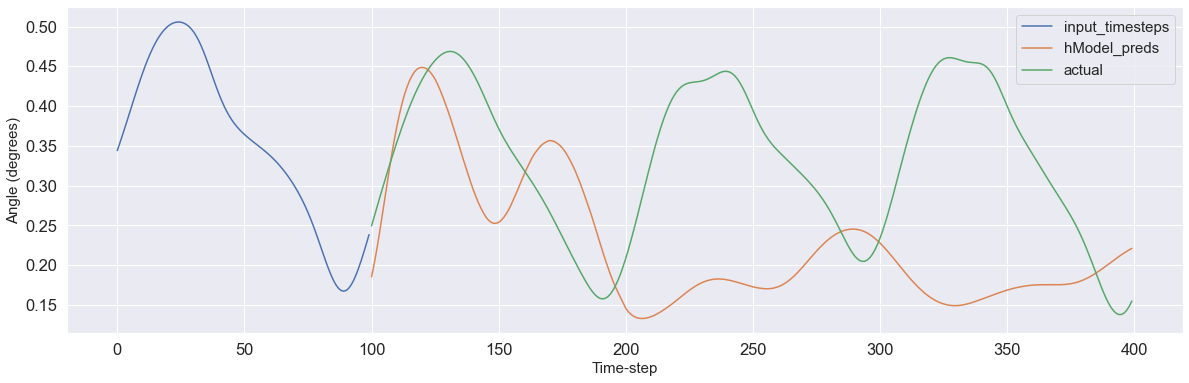

torch.Size([100])
(300,)


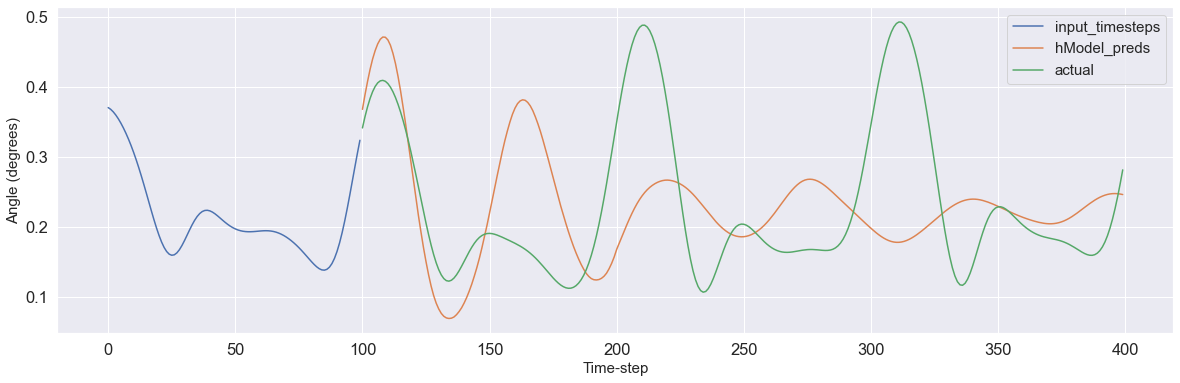

torch.Size([100])
(300,)


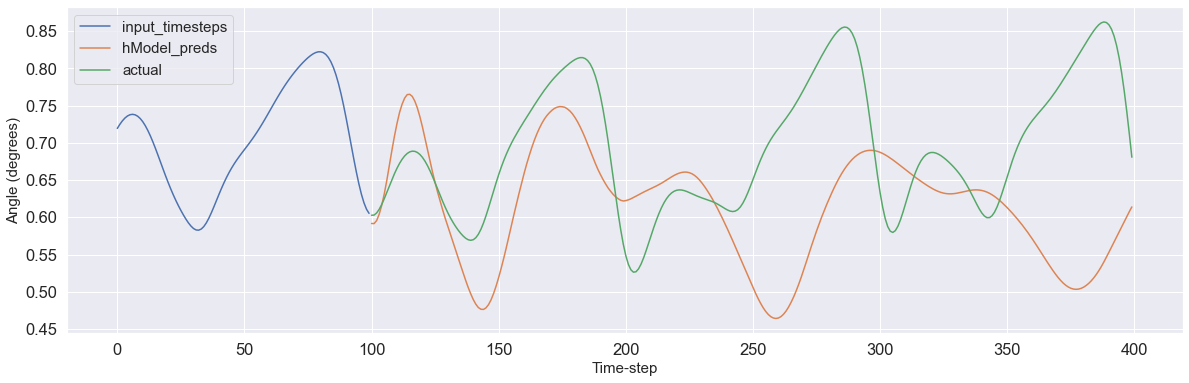

torch.Size([100])
(300,)


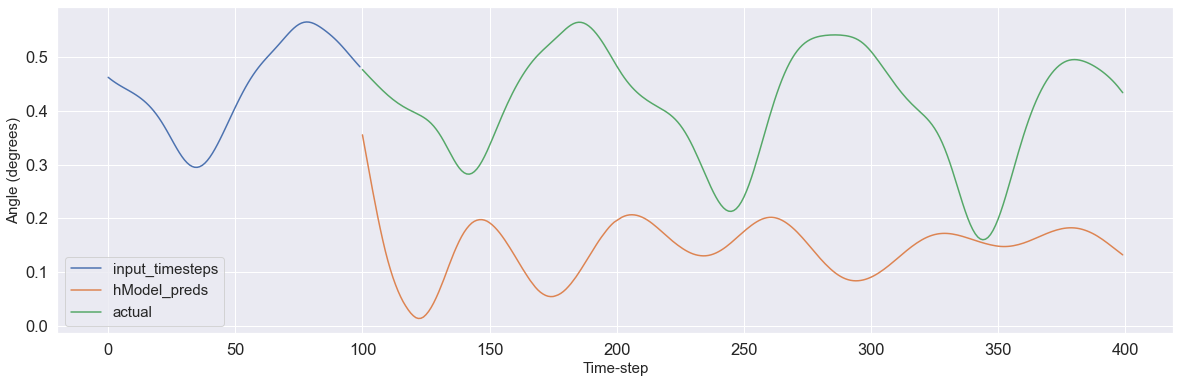

torch.Size([100])
(300,)


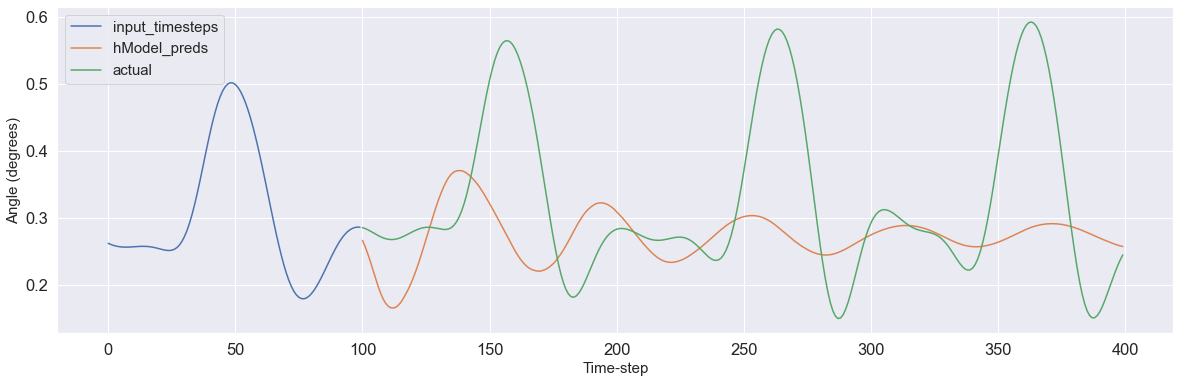

torch.Size([100])
(300,)


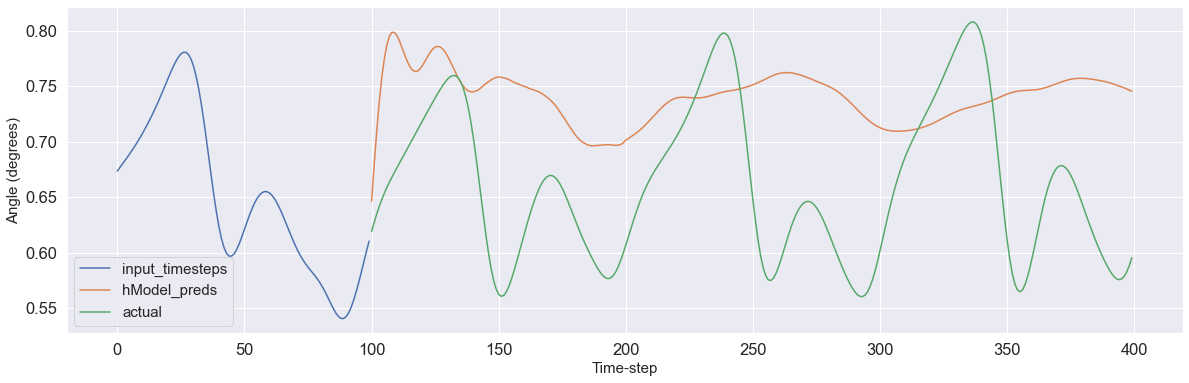

In [256]:
#only use for multiple timesteps
input_seq = hModel_X_test_tensor[s].expand((1,-1,-1))


for f in range(len(features)):
    path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
    input = input_seq[:,:,f].squeeze()
    print(input.shape)

    predicted_trajectory = all_future_preds[:,f]
    print(predicted_trajectory.shape)

    past_timepoints = np.arange(0,len(input))
    # print(f'past_timepoints: {past_timepoints}')

    future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
    # print(f'future_timepoints: {future_timepoints}')

    actual_seq = hModel_Y_test_tensor[s:s+nsteps_future,0,f].reshape(-1,1).squeeze()
    actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

    rcParams['figure.figsize'] = 20,6

    # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
    ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

    # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
    ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

    ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
    # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

    # ax.set(font_scale = 1)
    # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

    fontsize = 15
    ax.set_xlabel('Time-step', fontsize =15)
    ax.set_ylabel('Angle (degrees)', fontsize =15)

    plt.legend(fontsize = 15)
  
    plt.savefig(path)
    plt.show()


In [158]:
hModel_X_test_tensor.shape

torch.Size([28296, 100, 6])

#### Original Code

In [305]:
s = 1600#sample to plot
nsteps_future = 400 #number of steps to predict in the future 

with torch.no_grad(): #do not calculate gradients for forward pass
    in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE) 
    all_preds=[] 

    for _ in range(0,nsteps_future): #loop over the steps to predict in the future
        # print(f'in_to_model: {in_to_model[:,-10:,1]}')
        future_pred = hModel(in_to_model)

        all_preds.append(future_pred.tolist())

        new_in_to_model = torch.cat((in_to_model, future_pred),1)
        in_to_model = new_in_to_model[:,1:,:]

all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

all_future_preds.shape

(400, 6)

torch.Size([100])
(400,)


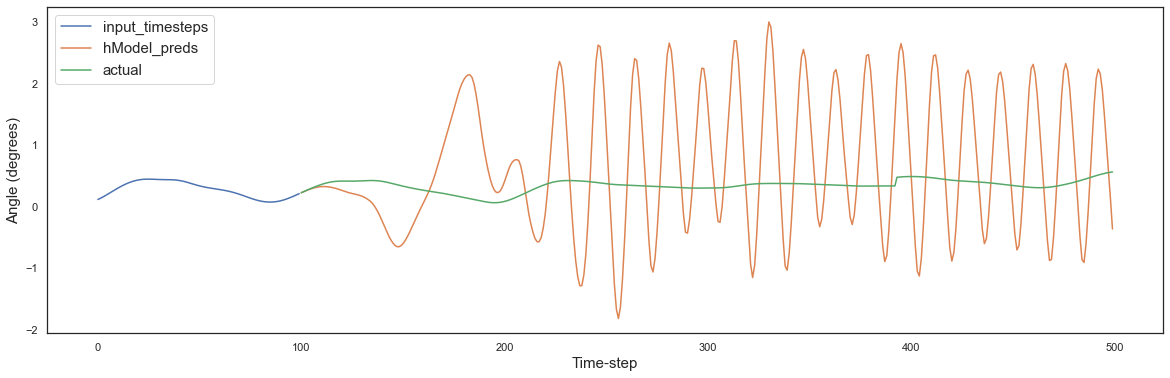

torch.Size([100])
(400,)


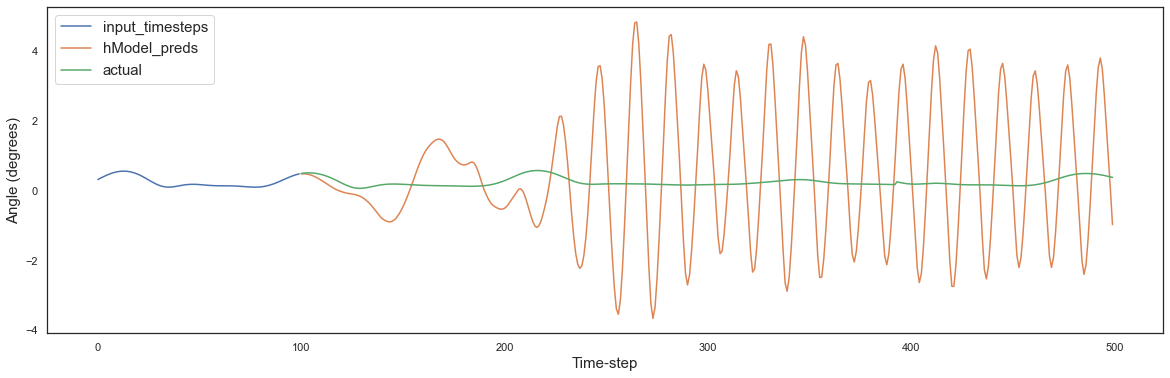

torch.Size([100])
(400,)


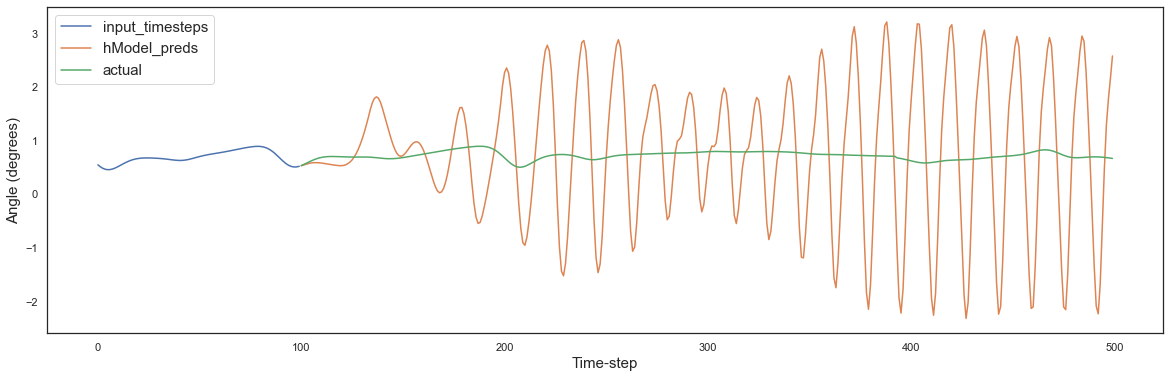

torch.Size([100])
(400,)


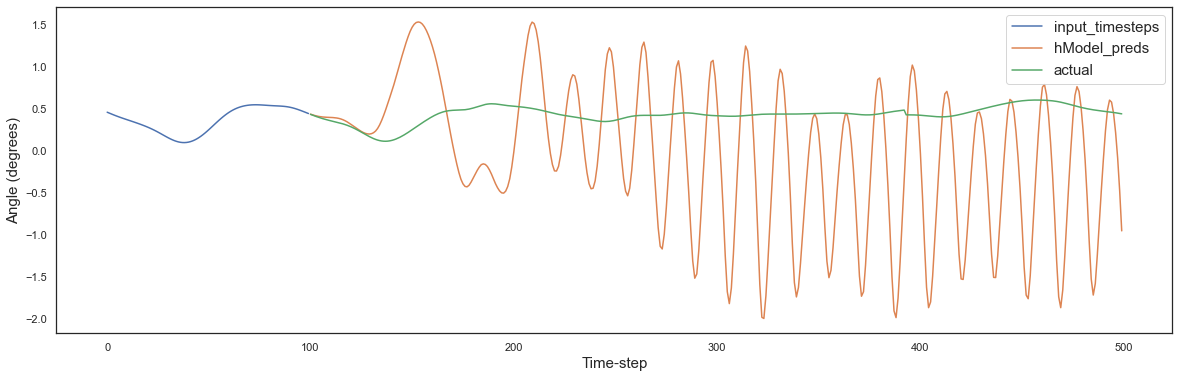

torch.Size([100])
(400,)


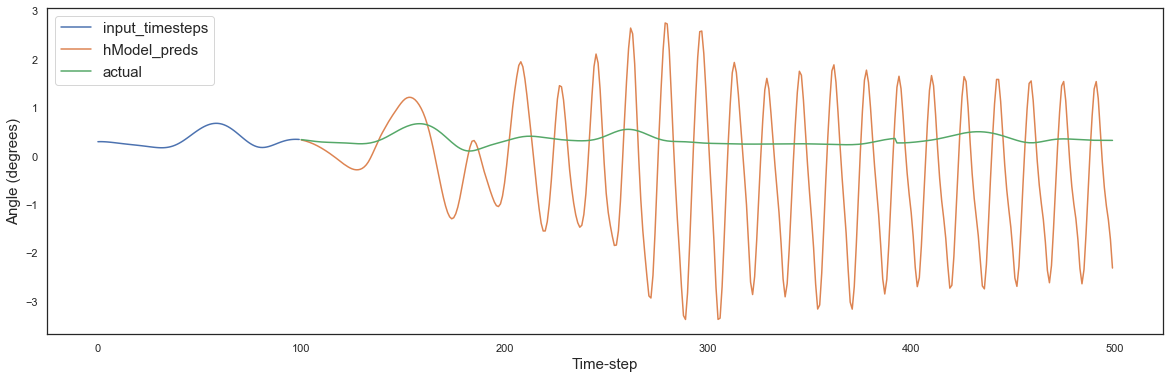

torch.Size([100])
(400,)


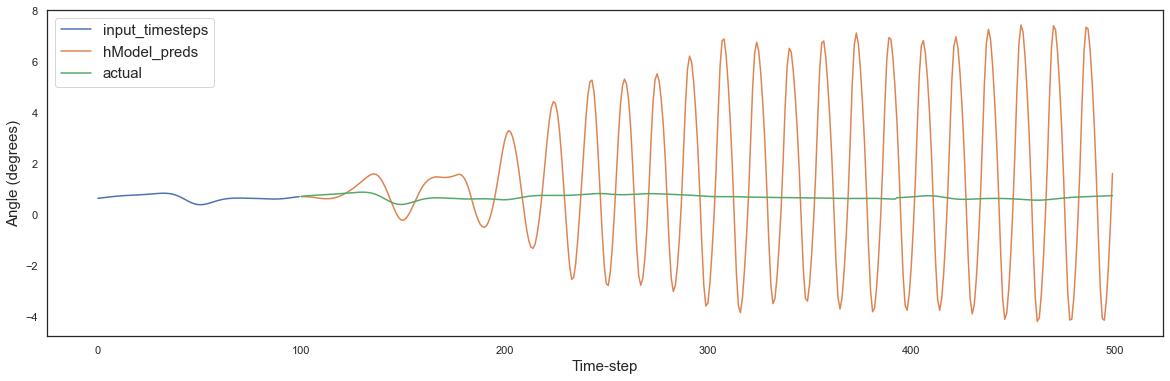

In [306]:
input_seq = hModel_X_test_tensor[s].expand((1,-1,-1))


for f in range(len(features)):
    path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
    input = input_seq[:,:,f].squeeze()
    print(input.shape)

    predicted_trajectory = all_future_preds[:,f]
    print(predicted_trajectory.shape)

    past_timepoints = np.arange(0,len(input))
    # print(f'past_timepoints: {past_timepoints}')

    future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
    # print(f'future_timepoints: {future_timepoints}')

    actual_seq = hModel_Y_test_tensor[s:s+nsteps_future,:,f].reshape(-1,1).squeeze()
    actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

    rcParams['figure.figsize'] = 20,6

    # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
    ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

    # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
    ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

    ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
    # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

    # ax.set(font_scale = 1)
    # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

    fontsize = 15
    ax.set_xlabel('Time-step', fontsize =15)
    ax.set_ylabel('Angle (degrees)', fontsize =15)

    plt.legend(fontsize = 15)
  
    # plt.savefig(path)
    plt.show()


In [ ]:
#original sequence size [n_samples, timesteps, featuers]

#take only one timesteps from each sample + choose one feature only [:, 1, f]

#flatten sequence and plot 

in_seq_to_plt = X_sample.cpu().numpy()

gen_seq_to_plt = generated_sequence.cpu().numpy()

in_seq_to_plt_denorm = denormalise(in_seq_to_plt, scalars)
gen_seq_to_plt_denorm = denormalise(gen_seq_to_plt, scalars)

in_seq_to_plt_denorm = in_seq_to_plt_denorm[:, :, 1]
gen_seq_to_plt_denorm = gen_seq_to_plt_denorm[:, 0, 1]

print('in_seq_to_plt_denorm')
print(in_seq_to_plt_denorm)
print('gen_seq_to_plt_denorm')
print(gen_seq_to_plt_denorm)



In [ ]:
past_timepoints=np.array()

ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:])
# ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
ax = sns.lineplot(x=future_timepoints, y=preds)
ax = sns.lineplot(x=future_timepoints, y=actual)

### Benchmark

#### Benchmark against naive method 

In [ ]:
## benchmark against naive output (making prediction only last value)
naive_1_train_output = np.zeros(Y_train_data.shape)

for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_1_train_output[s,:,f] = np.ones((output_window)) * X_train_data[s,-1,f]



# print(naive_1_test_output.shape)


# naive_1_test_output[1,:,1]

# X_test_data[1,:,1]



In [ ]:
naive_1_mse_loss, naive_1_mse_std = mse_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')
naive_1_mae_loss, naive_1_mae_std = mae_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')

print(f'naive_1 MSE Loss: {naive_1_mse_loss}')
print(f'naive_1 MSE std: {naive_1_mse_std} ')
print(f'naive_1 MAE Loss: {naive_1_mae_loss}')
print(f'naive_1 MAE std: {naive_1_mae_std}')

In [ ]:
## benchmark against mean output

naive_average_train_output = np.zeros(Y_train_data.shape)

for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_average_train_output[s,:,f] = np.ones((output_window)) * np.mean(X_train_data[s,:,f])



print(naive_average_train_output.shape)



In [ ]:
naive_average_mse_loss, naive_average_mse_std = mse_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')
naive_average_mae_loss, naive_average_mae_std = mae_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')

print(f'average MSE Loss: {naive_average_mse_loss}')
print(f'average MSE std: {naive_average_mse_std} ')
print(f'average MAE Loss: {naive_average_mae_loss}')
print(f'average MAE std: {naive_average_mae_std}')

### Save Progress and Results

In [255]:
# model = 'LSTM'
# exp_ID = '022'

out_fname = r'D:\Study 2 Results and Models\Investigation Results' + '\\' + 'Study 2 Experimentation Results' + '.txt'
comments = 'Using transformers'


In [256]:
# if os.path.exists(out_fname):
#     print('ERROR: File with this name already exists, try alternative name.')
    
# else:
with open(out_fname, 'a+') as text_file:
    
    print('Experiment Report', file=text_file)
    print(f'{exp_ID}: {date.today()}',file=text_file)
    # print('\n', file=text_file)
    print(f'model: {model}', file=text_file)
    print(f'features: {features} \n', file=text_file)
    print(f'Comments: {comments} \n', file=text_file)

    print('Information on Data', file=text_file)
    print(f'train size: {train_sample_sum}', file=text_file)
    print(f'validation size: {val_sample_sum}', file=text_file)
    print(f'Train subjects: {train_subjects}', file=text_file)
    print(f'Val subjects: {val_subjects}', file=text_file)
    print(f'Scalars: {scalars} \n', file=text_file)

    print('Model Hyperparameters', file=text_file)
    print(f'input window size: {input_window}', file=text_file)
    print(f'output window size: {output_window}', file=text_file)
    print(f'stride: {stride}', file=text_file)
    # print(f'epochs: {num_epochs}', file=text_file)
    print(f'best epoch: {best_epoch}', file=text_file)
    print(f'hidden size: {hidden_size}', file=text_file)
    print(f'number of layers: {num_layers}', file=text_file)
    print(f'learning rate: {learning_rate}', file=text_file)
    print(f'optimiser: MSE', file=text_file)

    print('\n', file = text_file)
    print(f'Model Architecture', file=text_file)
    print(checkpoint_model, file=text_file)

    # print(f'Losses during training:', file=text_file)
    # print(f'training loss: {train_history}', file=text_file)
    # print(f'validation history: {val_history}', file=text_file)

    print('\n', file=text_file)
    print(f'Denomralised MSE and MAE: ', file=text_file)
    print(f'Validation MSE and std(degrees): {val_mse_loss:.3f}, {val_mse_std:.3f}', file=text_file)
    print(f'Validation MAE and std (degrees): {val_mae_loss:.3f}, {val_mae_std:.3f}', file=text_file)
    # print('\n', file=text_file)
    print('--------------------------------------------------------------------------------------------------------', file=text_file)


print("Generation of text file complete.")

Generation of text file complete.


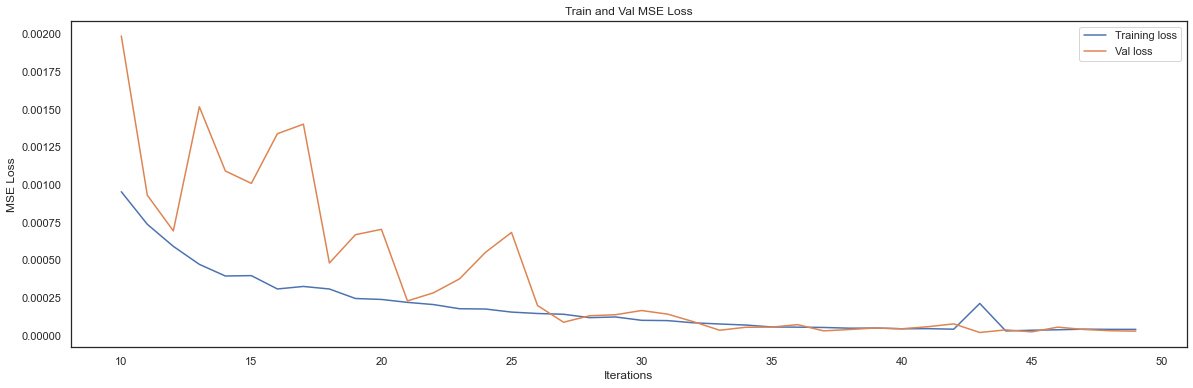

In [257]:
plt_path = r'D:\Study 2 Results and Models\Investigations Plots' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '(loss)' + '.png'
fst_e = 10 #first epoch to start plotting for 
x = [i for i in range(fst_e,num_epochs)]
# print(x)
# print(train_history[20:145].shape)
plt.plot(x,train_history[fst_e:], label = 'Training loss')
plt.plot(x,val_history[fst_e:], label = 'Val loss')
# plt.plot(train_history, label = 'Training loss')
# plt.plot(val_history, label = 'Val loss')


plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Train and Val MSE Loss')
plt.legend()
plt.savefig(plt_path)

In [ ]:
import_path = r'D:\Study 1 Results and Models\Study 1 Models\LSTM_4' + '\\' + 'Exp014-2022-02-10-LSTM-In120-Out3.pickle'
# # # import_path = r'C:\Users\Rania\rbk9\Study 1 Results and Models\Study 1 Models\CNN_1' + '\\' + 'Exp001-2022-01-24-CNN-In96-Out1.pickle'
# # # model_CNN = CNN(input_size, output_size=output_size, kernel_size=kernel_size, stride=1, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

input_size=len(features)
hidden_size=128
num_layers=4
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
# num_epochs=60

# # learning_rate= 0.001

model_LSTM = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
model_LSTM.load_state_dict(torch.load(import_path))
model_LSTM.eval()

In [ ]:
pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

predicted_values_val = pred_val_output.cpu().numpy()
actual_values_val = actual_val_output.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values test: {predicted_values_val.shape}')
print(f'shape of actual values test: {actual_values_val.shape}')

predicted_val_denorm = denormalise(predicted_values_val, scalars)
actual_val_denorm = denormalise(actual_values_val, scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

In [ ]:
# for p in model_LSTM.parameters():
#     print(p.device)

In [ ]:
# # Testing function 
# def test_LSTM(model, dataloader):
#     loss_function = nn.MSELoss(reduction='mean')
#     model.eval()
#     actual_output, pred_output = [], []
#     running_loss = 0. 
    
#     with torch.no_grad():
#         for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

#             batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

#             # if idx==0:
#             #     batch_preds = model(batch_inputs)
#             #     # print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     current_preds = batch_preds
#             #     all_preds = batch_preds

#             # else:
#             #     batch_preds = model(batch_inputs)
#             #     print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
#             #     current_preds = batch_preds

#             batch_preds = model(batch_inputs)
#             # print(f'batch preds: {batch_preds.type}')
#             loss = loss_function(batch_preds, batch_targets)
#             running_loss += loss.item()
#             actual_output.append(batch_targets)
#             pred_output.append(batch_preds)


#             #             lst = []
#             # print(f'{x.size()}')
#             # for i in range(10):
#             #     x += i  # say we do something with x at iteration i
#             #     lst.append(x)
#             # # lstt = torch.stack([x for _ in range(10)])
#             # lstt = torch.stack(lst)
#             # print(lstt.size())

#         total_loss = running_loss / len(dataloader)

#         actual_output_tensor = torch.vstack(actual_output)
#         pred_output_tensor = torch.vstack(pred_output)
    
#     return pred_output_tensor, actual_output_tensor, total_loss

In [ ]:
# # Creates dataset object that gets individual samples for training/testing so that the Dataloader can generate batches
# class gaitDataset(Dataset):
#     def __init__(self, x, y):
#         self.x = x 
#         self.y = y 

#     def __len__(self):
#         return self.x.shape[0]
    
#     def __getitem__(self, index):
#         X_sample = self.x[index, :, :]
#         Y_sample = self.y[index, :, :]
#         return X_sample, Y_sample

In [ ]:
# # X_test_norm = normalise_transform(X_test_data, scalars)
# # Y_test_norm = normalise_transform(Y_test_data, scalars)

# # Convert to Tensor 
# # do not store on GPU (yet)
# X_test = torch.from_numpy(X_train_norm).float()
# Y_test = torch.from_numpy(Y_train_norm).float()

# print(f'X_test shape: {X_test.shape}')
# print(f'Y_test shape: {Y_test.shape}')

In [ ]:
# test_dataset = gaitDataset(X_test, Y_test)
# # # test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
# test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) #ADJUSTED

# print(f"Test Dataset length: {len(test_dataset)}")

In [ ]:
# pred_test_output, actual_test_output, test_loss = test_LSTM(model_LSTM, test_dataloader)

# predicted_values_test = pred_test_output.cpu().numpy() # premute again to make the order of the array (samples, windows, features)
# actual_values_test =  actual_test_output.cpu().numpy()

# print(f'test loss: {test_loss}')

# print(f'Shape of predicted values test: {predicted_values_test.shape}')
# print(f'shape of actual values test: {actual_values_test.shape}')

# predicted_test_denorm = denormalise(predicted_values_test, scalars)
# actual_test_denorm =  denormalise(actual_values_test, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_test_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_test_denorm.shape}')

In [ ]:
test_mse_loss, test_mse_std = mse_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')
test_mae_loss, test_mae_std = mae_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')

print(f'Test MSE Loss: {test_mse_loss}')
print(f'Test MSE std: {test_mse_std} ')

# MDE= mae_loss(actual_test_denorm[:-1,:,:],actual_test_denorm[1:,:,:],reduction='mean', format='np')
MDE= mae_loss(actual_test_denorm[:,:,:],actual_test_denorm[:,:,:],reduction='mean', format='np')

print(f'Test MAE Loss: {test_mae_loss}')
print(f'Test MAE std: {test_mae_std}')

In [ ]:
plt.hist(np.abs(predicted_test_denorm[:,:,1].reshape(-1,1) - actual_test_denorm[:,:,1].reshape(-1,1)))



In [ ]:
actual = np.array([23,36,28,33,44,22,12,10,1])
predicted = np.array([23, 35.5, 28.1, 33, 45, 15, 13, 8, 0])

actual-predicted

In [ ]:
abs_values = np.abs(actual-predicted)

plt.hist(abs_values)

In [ ]:


np.abs(actual-predicted).std()
